<a href="https://colab.research.google.com/github/MariiaKalinina/R/blob/main/Rosatom_new_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Libraries

In [1]:
import numpy as np
import torch
from math import *
from scipy import integrate
from numpy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline
from numba import njit
import numpy as np
from scipy.integrate import dblquad

import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import matplotlib.colors

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline
csfont = {'fontname':'Times New Roman'}

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Your imports
from mlxtend.plotting import plot_decision_regions

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, QuantileTransformer, FunctionTransformer, MinMaxScaler
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse

from sklearn.model_selection import GridSearchCV, PredefinedSplit

import time
import math
from sklearn.metrics import roc_curve, average_precision_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
!pip install GitPython
from git import Repo
!git clone https://github.com/MariiaKalinina/R.git R

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.3 MB/s eta 0:00:00
Cloning into 'R'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 33 (delta 12), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 12.65 MiB | 25.45 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [106]:
path_to_ser = Path('/content/R/Data/Rosatom_dataset.xlsx')
data_initial = pd.read_excel(path_to_ser, sheet_name='Well logging', skiprows=0)
data = data_initial.copy()

In [107]:
data[:10]

,Sample ID,Top Depth,TC initial,Offset,Depth_TC,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Глубина_ГК,...,Глубина_Rez,Rez,Глубина_КВ,КВ (c вычета долота),N/A,КВ (без вычета долота)?,Глубина_КС,КС,Глубина_Термометрия,Темометрия
0,#,m,W/(m·K),m,m,NaN,NaN,через 5,NaN,м,...,м,NaN,м,NaN,NaN,NaN,м,Ом*м,м,Градуссы Цельсия
1,625,30.52,2.555,0,30.525,NaN,NaN,NaN,NaN,0.1,...,12.7,35.31,0.04,6.0,-108.0,120.0,12.7,480.68,0.04,18.8
2,625,30.52,2.556,0.001,30.526,NaN,0.001,NaN,NaN,0.2,...,12.8,28.72,0.14,6.4,-107.6,120.4,12.8,474.61,0.14,18.8
3,625,30.52,2.52,0.002,30.527,NaN,0.001,NaN,NaN,0.3,...,12.9,28.73,0.24,6.4,-107.6,120.4,12.9,416.4,0.24,18.8
4,625,30.52,2.541,0.003,30.528,NaN,0.001,NaN,NaN,0.4,...,13,28.70,0.34,6.4,-107.6,120.4,13,452.74,0.34,18.72
5,625,30.52,2.566,0.004,30.529,NaN,0.001,NaN,NaN,0.5,...,13.1,28.68,0.44,5.6,-108.4,119.6,13.1,451.98,0.44,18.72
6,625,30.52,2.527,0.005,30.53,NaN,0.001,NaN,NaN,0.6,...,13.2,28.64,0.54,5.6,-108.4,119.6,13.2,441.43,0.54,18.68
7,625,30.52,2.557,0.006,30.531,NaN,0.001,NaN,NaN,0.7,...,13.3,28.71,0.64,5.2,-108.8,119.2,13.3,511.12,0.64,18.6
8,625,30.52,2.496,0.007,30.532,NaN,0.001,NaN,NaN,0.8,...,13.4,28.60,0.74,5.6,-108.4,119.6,13.4,443.1,0.74,18.56
9,625,30.52,2.495,0.008,30.533,NaN,0.001,NaN,NaN,0.9,...,13.5,28.59,0.84,6.0,-108.0,120.0,13.5,389.29,0.84,18.48


In [108]:
# data.columns

In [109]:
data.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], axis=1, inplace=True)

In [110]:
data.rename(columns={'Глубина': 'Глубина_КС'}, inplace=True)

data.rename(columns={'ГК': 'ГК '}, inplace=True)
data.rename(columns={'Глубина_ГК': 'Глубина_ГК '}, inplace=True)

data.rename(columns={'ГГК-п ': 'ГГпК'}, inplace=True)
data.rename(columns={'Глубина_ГГК-п': 'Глубина_ГГпК'}, inplace=True)

In [111]:
# Разделение исходных данных на две таблицы - ГИС и НТПК
well_logs = data[['Глубина_ГК ',
       'ГК ', 'Глубина_ГГпК', 'ГГпК', 'Глубина_ПС', 'ПС',
       'Глубина_КС', 'КС']]
well_logs = well_logs.drop(0)
well_logs['Глубина_ПС'] = well_logs['Глубина_ПС'] - 0.04

thermal_logs = data[['Sample ID', 'Top Depth', 'TC initial', 'Offset', 'Depth_TC']]

In [112]:
# # selected_columns = [value for value in well_logs if "Глубина" not in value]
# print(selected_columns)
# well_logs[selected_columns].describe()

In [113]:
well_logs

,Глубина_ГК,ГК,Глубина_ГГпК,ГГпК,Глубина_ПС,ПС,Глубина_КС,КС
1,0.1,9.27,1.9,48640,12.4,663.50,12.7,480.68
2,0.2,9.67,2,50190,12.5,520.10,12.8,474.61
3,0.3,10.12,2.1,50580,12.6,387.37,12.9,416.4
4,0.4,9.94,2.2,50580,12.7,361.20,13,452.74
5,0.5,9.98,2.3,51220,12.8,360.66,13.1,451.98
...,...,...,...,...,...,...,...,...
97763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
well_logs.columns

Index(['Глубина_ГК ', 'ГК ', 'Глубина_ГГпК', 'ГГпК', 'Глубина_ПС', 'ПС',
       'Глубина_КС', 'КС'],
      dtype='object')

In [68]:
well_logs[['Глубина_ПС', 'ПС']]

,Глубина_ПС,ПС
1,12.4,663.50
2,12.5,520.10
3,12.6,387.37
4,12.7,361.20
5,12.8,360.66
...,...,...
97763,NaN,NaN
97764,NaN,NaN
97765,NaN,NaN
97766,NaN,NaN


In [ ]:
p.arange(lower_bound, upper_bound+0.1, filtered_df.shape[0])

In [118]:

def filter_numeric_range(df, column_name, lower_bound, upper_bound, step):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    filtered_df = filtered_df.dropna()
    filtered_df['Глубина'] = filtered_df[column_name]
    print(filtered_df.shape, min(filtered_df[column_name]), max(filtered_df[column_name]), filtered_df.shape[0])
    return filtered_df.reset_index(drop=True)


# Filter and convert columns using the function
lower_bound, upper_bound, step = 12.7, 164.1, 0.1
filtered_df_1 = filter_numeric_range(well_logs[['Глубина_ГК ', 'ГК ']], 'Глубина_ГК ', lower_bound, upper_bound, step)
filtered_df_2 = filter_numeric_range(well_logs[['Глубина_ГГпК', 'ГГпК']], 'Глубина_ГГпК', lower_bound, upper_bound, step)
filtered_df_3 = filter_numeric_range(well_logs[['Глубина_ПС', 'ПС']], 'Глубина_ПС', lower_bound, upper_bound, step)
filtered_df_4 = filter_numeric_range(well_logs[['Глубина_КС', 'КС']], 'Глубина_КС', lower_bound, upper_bound, step)



# result = pd.merge(filtered_df_1, filtered_df_4 , on="Глубина", how='inner')
result = pd.merge(filtered_df_1, filtered_df_2, on="Глубина", how='inner')  # Merge filtered_df_1 and filtered_df_4

result = pd.merge(result, filtered_df_3, on="Глубина", how='inner')  # Merge filtered_df_2 with the existing result DataFrame

result = pd.merge(result, filtered_df_4, on="Глубина", how='inner')  # Merge filtered_df_3 with the existing result DataFrame
# # new_df.reset_index(drop=True, inplace=True)

columns_to_drop = [col_name for col_name in well_logs.columns if 'Глубина_' in col_name]
result.drop(columns=columns_to_drop, inplace=True)


well_logs_merged = result[['Глубина', 'ГК ', 'ГГпК', 'ПС', 'КС']]
well_logs_merged

(1515, 3) 12.7 164.1 1515
(1515, 3) 12.7 164.1 1515
(1515, 3) 12.700000000000001 164.1 1515
(1515, 3) 12.7 164.1 1515


,Глубина,ГК,ГГпК,ПС,КС
0,12.8,17.27,37180,360.66,474.61
1,12.9,16.55,37313.33,362.58,416.4
2,13.0,17.76,36765,373.74,452.74
3,13.3,20.77,37886.67,373.62,511.12
4,13.4,21.58,37173.33,384.41,443.1
...,...,...,...,...,...
1072,163.6,22.32,32135,441.33,2747.14
1073,163.8,22.5,33155,409.83,2904.53
1074,163.9,21.41,33695,399.94,2989.96
1075,164.0,20.49,33653.33,382.84,3060.61


In [99]:
filtered_df_4

,Глубина_КС,КС,Глубина
0,12.7,480.68,12.7
1,12.8,474.61,12.8
2,12.9,416.4,12.9
3,13.0,452.74,13.0
4,13.1,451.98,13.1
...,...,...,...
1510,163.7,2819.2,163.7
1511,163.8,2904.53,163.8
1512,163.9,2989.96,163.9
1513,164.0,3060.61,164.0


In [74]:

filtered_df_3

,Глубина_ПС,ПС
0,12.4,663.50
1,12.5,520.10
2,12.6,387.37
3,12.7,361.20
4,12.8,360.66
...,...,...
1513,163.7,431.59
1514,163.8,409.83
1515,163.9,399.94
1516,164.0,382.84


In [33]:
well_logs.columns

Index(['Глубина_ГК ', 'ГК ', 'Глубина_ГГпК', 'ГГпК', 'Глубина_ПС', 'ПС',
       'Глубина_КС', 'КС'],
      dtype='object')

In [39]:
filtered_df_3

,Глубина_ПС,ПС
1,12.44,663.50
2,12.54,520.10
3,12.64,387.37
4,12.74,361.20
5,12.84,360.66
...,...,...
1522,164.54,301.06
1523,164.64,271.30
1524,164.74,223.45
1525,164.84,184.93


In [14]:
well_logs.columns

Index(['Глубина_ГК ', 'ГК ', 'Глубина_ГГпК', 'ГГпК', 'Глубина_ПС', 'ПС',
       'Глубина_КС', 'КС'],
      dtype='object')

In [ ]:
filtered_well_logs = well_logs.copy()

for column in well_logs.columns:
    if 'Глубина' in column:
        print(column)
        filtered_well_logs[column] = pd.to_numeric(filtered_well_logs[column], errors='coerce')
        filtered_well_logs = filtered_well_logs[(filtered_well_logs[column] >= 12) & (filtered_well_logs[column] <= 164.1)]



# filtered_well_logs now contains the filtered data based on the specified conditions

Глубина_ГК 
['Г', 'л', 'у', 'б', 'и', 'н', 'а', '_', 'Г', 'К', ' ']
Глубина_ГГпК
['Г', 'л', 'у', 'б', 'и', 'н', 'а', '_', 'Г', 'Г', 'п', 'К']
Глубина_ПС
['Г', 'л', 'у', 'б', 'и', 'н', 'а', '_', 'П', 'С']
Глубина_КС
['Г', 'л', 'у', 'б', 'и', 'н', 'а', '_', 'К', 'С']


In [17]:
# Python
filtered_well_logs = well_logs[(well_logs['Глубина_ГК '] >= 12) & (well_logs['Глубина_ГК '] <= 165) & (well_logs['ГК '] == well_logs['Глубина_ГК '])]

In [19]:
# Python

selected_values = []
for index, row in filtered_well_logs.iterrows():
    if row['Глубина_ГК'] >= 12 and row['Глубина_ГК'] <= 165 and row['ГК'] == row['Глубина_ГК']:
        selected_values.append(row)

selected_df = pd.DataFrame(selected_values)

In [20]:
selected_df

""


In [ ]:
well_logs.describe()

,ПС,Rez,КВ (c вычета долота),N/A,КВ (без вычета долота)?
count,1527.000000,1524.000000,1644.000000,1644.000000,1644.000000
mean,470.431015,29.360630,-3.465797,-117.465797,110.534203
std,92.972433,0.550079,3.689368,3.689368,3.689368
min,184.930000,28.140000,-7.950000,-121.950000,106.050000
25%,400.585000,28.880000,-5.150000,-119.150000,108.850000
50%,474.970000,29.390000,-4.780000,-118.780000,109.220000
75%,542.270000,29.842500,-4.590000,-118.590000,109.410000
max,728.510000,35.310000,20.210000,-93.790000,134.210000


In [ ]:
well_logs[1630:1650] # 1529

,Глубина_ГК,ГК,Глубина_ГГпК,ГГпК,Глубина_ПС,ПС,Глубина_Rez,Rez,Глубина_КВ,КВ (c вычета долота),N/A,КВ (без вычета долота)?,Глубина_КС,КС,Глубина_Термометрия,Темометрия
1630,163,23.08,164.8,32250,NaN,NaN,NaN,NaN,162.94,-7.41,-121.41,106.59,NaN,NaN,162.94,8.24
1631,163.1,21.38,164.9,31820,NaN,NaN,NaN,NaN,163.04,-7.41,-121.41,106.59,NaN,NaN,163.04,8.24
1632,163.2,20.15,165,29530,NaN,NaN,NaN,NaN,163.14,-7.41,-121.41,106.59,NaN,NaN,163.14,8.24
1633,163.3,21.05,NaN,NaN,NaN,NaN,NaN,NaN,163.24,-7.41,-121.41,106.59,NaN,NaN,163.24,8.26
1634,163.4,22.06,NaN,NaN,NaN,NaN,NaN,NaN,163.34,-7.41,-121.41,106.59,NaN,NaN,163.34,8.26
1635,163.5,21.8,NaN,NaN,NaN,NaN,NaN,NaN,163.44,-7.41,-121.41,106.59,NaN,NaN,163.44,8.24
1636,163.6,22.32,NaN,NaN,NaN,NaN,NaN,NaN,163.54,-7.41,-121.41,106.59,NaN,NaN,163.54,8.24
1637,163.7,22.99,NaN,NaN,NaN,NaN,NaN,NaN,163.64,-7.41,-121.41,106.59,NaN,NaN,163.64,8.24
1638,163.8,22.5,NaN,NaN,NaN,NaN,NaN,NaN,163.74,-7.22,-121.22,106.78,NaN,NaN,163.74,8.24
1639,163.9,21.41,NaN,NaN,NaN,NaN,NaN,NaN,163.84,-7.41,-121.41,106.59,NaN,NaN,163.84,8.24


In [ ]:
for column in well_logs.columns:
    well_logs[column].dropna(inplace=True)

In [ ]:
well_logs[1630:1650]

,Глубина_ГК,ГК,Глубина_ГГпК,ГГпК,Глубина_ПС,ПС,Глубина_Rez,Rez,Глубина_КВ,КВ (c вычета долота),N/A,КВ (без вычета долота)?,Глубина_КС,КС,Глубина_Термометрия,Темометрия
1630,163,23.08,164.8,32250,NaN,NaN,NaN,NaN,162.94,-7.41,-121.41,106.59,NaN,NaN,162.94,8.24
1631,163.1,21.38,164.9,31820,NaN,NaN,NaN,NaN,163.04,-7.41,-121.41,106.59,NaN,NaN,163.04,8.24
1632,163.2,20.15,165,29530,NaN,NaN,NaN,NaN,163.14,-7.41,-121.41,106.59,NaN,NaN,163.14,8.24
1633,163.3,21.05,NaN,NaN,NaN,NaN,NaN,NaN,163.24,-7.41,-121.41,106.59,NaN,NaN,163.24,8.26
1634,163.4,22.06,NaN,NaN,NaN,NaN,NaN,NaN,163.34,-7.41,-121.41,106.59,NaN,NaN,163.34,8.26
1635,163.5,21.8,NaN,NaN,NaN,NaN,NaN,NaN,163.44,-7.41,-121.41,106.59,NaN,NaN,163.44,8.24
1636,163.6,22.32,NaN,NaN,NaN,NaN,NaN,NaN,163.54,-7.41,-121.41,106.59,NaN,NaN,163.54,8.24
1637,163.7,22.99,NaN,NaN,NaN,NaN,NaN,NaN,163.64,-7.41,-121.41,106.59,NaN,NaN,163.64,8.24
1638,163.8,22.5,NaN,NaN,NaN,NaN,NaN,NaN,163.74,-7.22,-121.22,106.78,NaN,NaN,163.74,8.24
1639,163.9,21.41,NaN,NaN,NaN,NaN,NaN,NaN,163.84,-7.41,-121.41,106.59,NaN,NaN,163.84,8.24


In [ ]:
thermal_logs[:-5]

,Sample ID,Top Depth,TC initial,Offset,Depth_TC
0,#,m,W/(m·K),m,m
1,625,30.52,2.555,0,30.525
2,625,30.52,2.556,0.001,30.526
3,625,30.52,2.52,0.002,30.527
4,625,30.52,2.541,0.003,30.528
...,...,...,...,...,...
97758,1,164.8,2.525,0.164,164.969
97759,1,164.8,2.709,0.165,164.97
97760,1,164.8,2.741,0.166,164.971
97761,1,164.8,2.92,0.167,164.972


In [ ]:
data.dropna(subset=['Depth_TC', 'Глубина_ГК'], inplace=True)

In [ ]:
data[:-5]

,Sample ID,Top Depth,TC initial,Offset,Depth_TC,Глубина_ГК,ГК,Глубина_ГГК-п,ГГК-п,Глубина_ПС,...,Глубина_Rez,Rez,Глубина_КВ,КВ (c вычета долота),N/A,КВ (без вычета долота)?,Глубина,КС,Глубина_Термометрия,Темометрия
0,#,m,W/(m·K),m,m,м,мкР/час,м,имп/мин,м,...,м,NaN,м,NaN,NaN,NaN,м,Ом*м,м,Градуссы Цельсия
1,625,30.52,2.555,0,30.525,0.1,9.27,1.9,48640,12.44,...,12.7,35.31,0.04,6.00,-108.00,120.00,12.7,480.68,0.04,18.8
2,625,30.52,2.556,0.001,30.526,0.2,9.67,2,50190,12.54,...,12.8,28.72,0.14,6.40,-107.60,120.40,12.8,474.61,0.14,18.8
3,625,30.52,2.52,0.002,30.527,0.3,10.12,2.1,50580,12.64,...,12.9,28.73,0.24,6.40,-107.60,120.40,12.9,416.4,0.24,18.8
4,625,30.52,2.541,0.003,30.528,0.4,9.94,2.2,50580,12.74,...,13,28.70,0.34,6.40,-107.60,120.40,13,452.74,0.34,18.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,631,38.51,2.061,0.077,38.592,163.2,20.15,165,29530,NaN,...,NaN,NaN,163.14,-7.41,-121.41,106.59,NaN,NaN,163.14,8.24
1633,631,38.51,1.892,0.078,38.593,163.3,21.05,NaN,NaN,NaN,...,NaN,NaN,163.24,-7.41,-121.41,106.59,NaN,NaN,163.24,8.26
1634,631,38.51,1.902,0.079,38.594,163.4,22.06,NaN,NaN,NaN,...,NaN,NaN,163.34,-7.41,-121.41,106.59,NaN,NaN,163.34,8.26
1635,631,38.51,1.865,0.08,38.595,163.5,21.8,NaN,NaN,NaN,...,NaN,NaN,163.44,-7.41,-121.41,106.59,NaN,NaN,163.44,8.24


In [ ]:
data.isnull().sum()

,0
Sample ID,0
Top Depth,0
TC initial,0
Offset,0
Depth_TC,0
Unnamed: 5,0
Unnamed: 6,0
Unnamed: 7,0
Unnamed: 8,0
Глубина_ГК,0


In [ ]:
data.columns

Index(['Sample ID', 'Top Depth', 'TC initial', 'Offset', 'Depth_TC',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Глубина_ГК ',
       'ГК ', 'Глубина_ГГпК', 'ГГпК', 'Глубина_ПС', 'ПС', 'Глубина_Rez', 'Rez',
       'Глубина_КВ', 'КВ (c вычета долота)', 'N/A', 'КВ (без вычета долота)?',
       'Глубина_КС', 'КС', 'Глубина_Термометрия', 'Темометрия'],
      dtype='object')

In [ ]:
work_well_logs = ['Глубина_ГК ',
       'ГК ', 'Глубина_ГГпК', 'ГГпК', 'Глубина_ПС', 'ПС', 'Глубина_Rez', 'Rez',
       'Глубина_КВ', 'КВ (c вычета долота)', 'N/A', 'КВ (без вычета долота)?',
       'Глубина_КС', 'КС', 'Глубина_Термометрия', 'Темометрия']

In [ ]:
# Filter names from work_well_logs that do not contain "Глубина"
well_names = [name for name in work_well_logs if "Глубина" not in name]
well_depth_names = [name for name in work_well_logs if "Глубина" in name]

In [ ]:
well_depth_names

['Глубина_ГК ',
 'Глубина_ГГпК',
 'Глубина_ПС',
 'Глубина_Rez',
 'Глубина_КВ',
 'Глубина_КС',
 'Глубина_Термометрия']

In [ ]:
data [:5]

,Sample ID,Top Depth,TC initial,Offset,Depth_TC,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Глубина_ГК,...,Глубина_Rez,Rez,Глубина_КВ,КВ (c вычета долота),N/A,КВ (без вычета долота)?,Глубина_КС,КС,Глубина_Термометрия,Темометрия


ГК  Глубина_ГК 
Series([], Name: ГК , dtype: object)
Series([], Name: ГК , dtype: object)


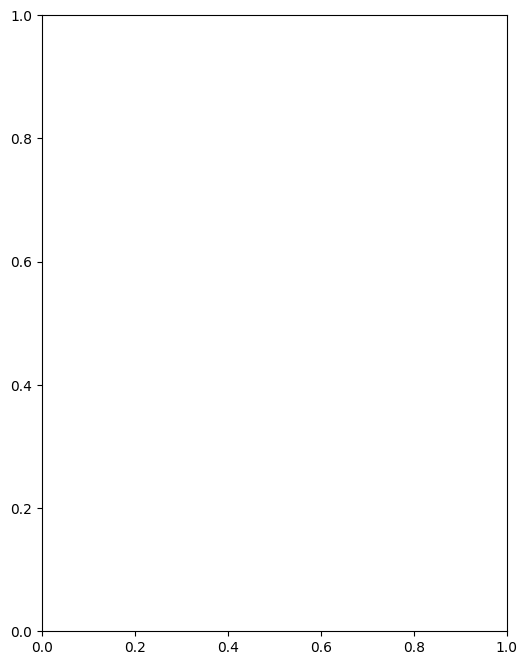

ГГпК Глубина_ГГпК
Series([], Name: ГГпК, dtype: object)
Series([], Name: ГГпК, dtype: object)


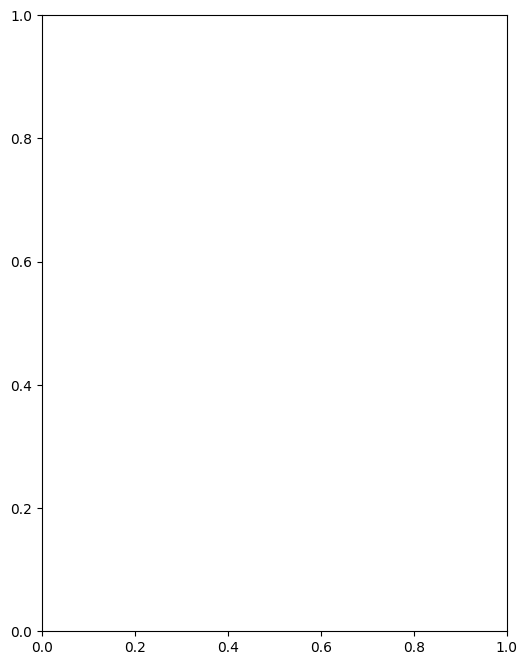

ПС Глубина_ПС
Series([], Name: ПС, dtype: float64)
Series([], Name: ПС, dtype: float64)


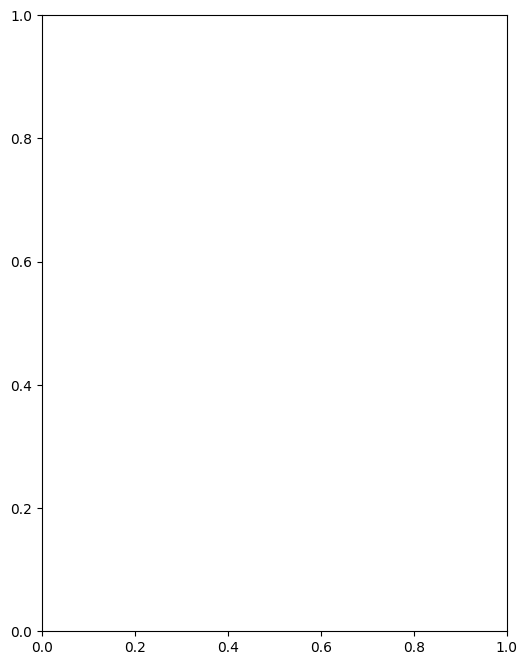

Rez Глубина_Rez
Series([], Name: Rez, dtype: float64)
Series([], Name: Rez, dtype: float64)


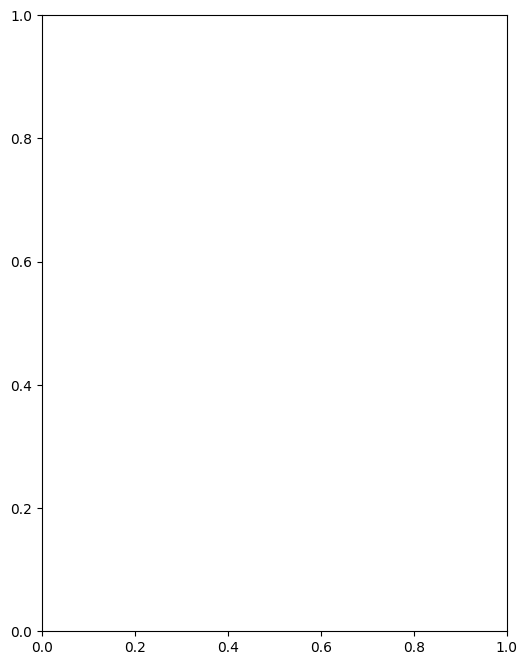

КВ (c вычета долота) 
Series([], Name: КВ (c вычета долота), dtype: float64)
Series([], Name: КВ (c вычета долота), dtype: float64)


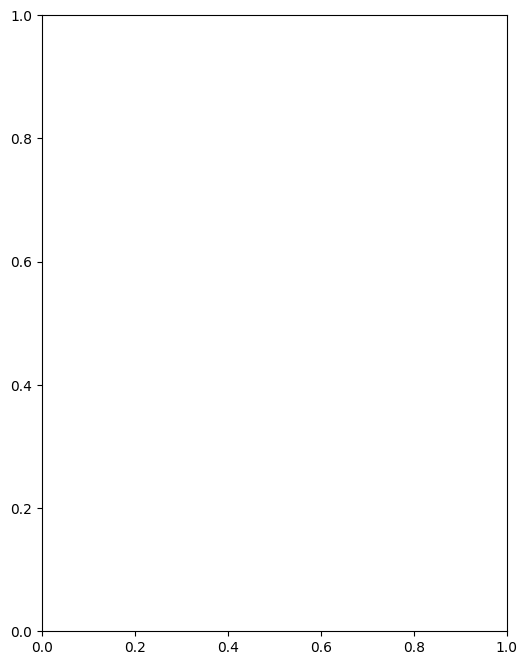

N/A 
Series([], Name: N/A, dtype: float64)
Series([], Name: N/A, dtype: float64)


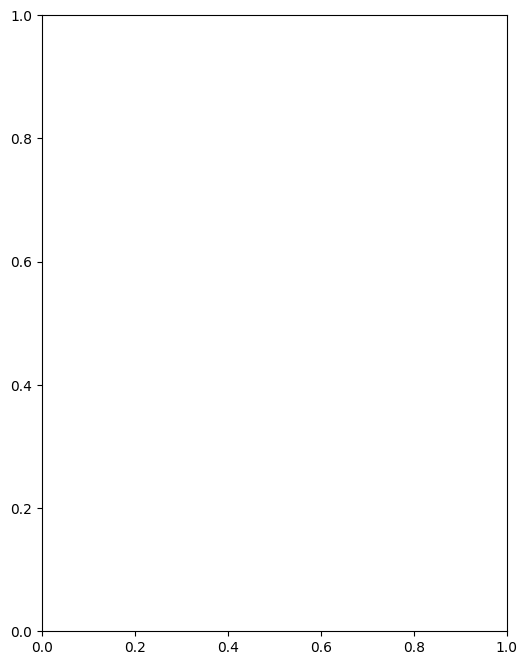

КВ (без вычета долота)? 
Series([], Name: КВ (без вычета долота)?, dtype: float64)
Series([], Name: КВ (без вычета долота)?, dtype: float64)


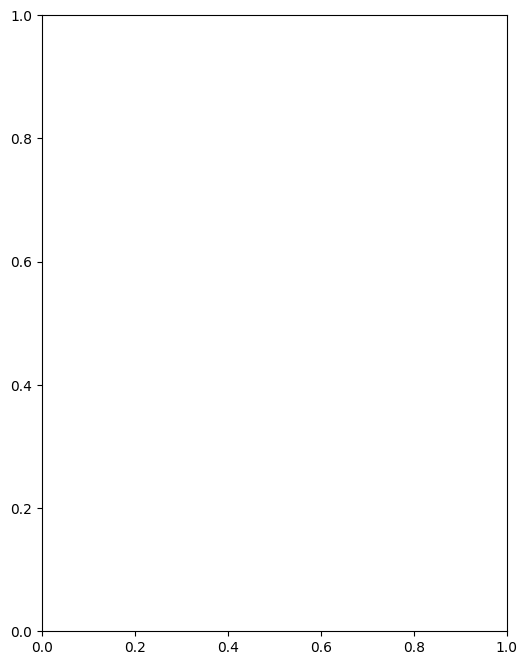

КС Глубина_КС
Series([], Name: КС, dtype: object)
Series([], Name: КС, dtype: object)


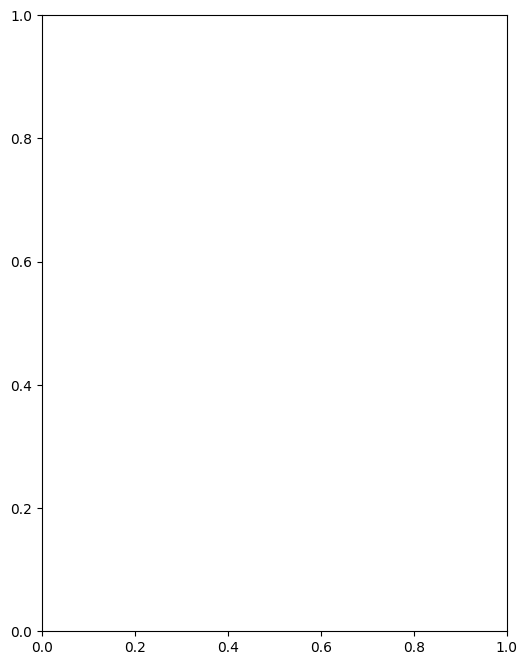

Темометрия 
Series([], Name: Темометрия, dtype: object)
Series([], Name: Темометрия, dtype: object)


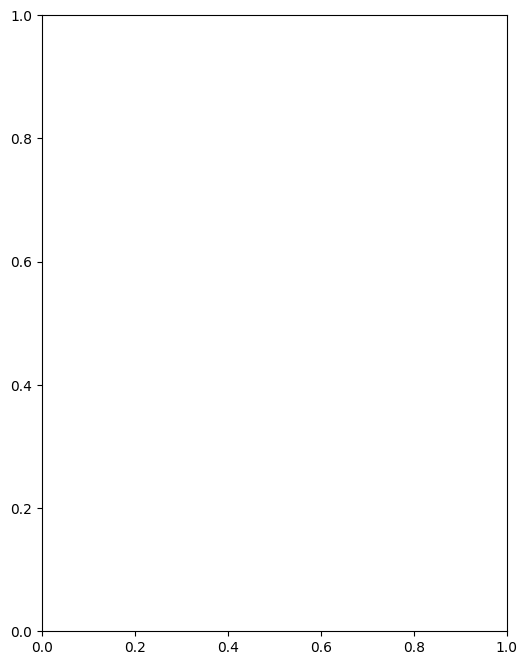

In [ ]:
for well_log in well_names:

  x = well_log
  x_name = str(well_log)
  y = [value for value in work_well_logs if x_name in value and "Глубина" in value]
  y_print = ' '.join(y)
  print(x, y_print)

  if y is None:
    pass
  else:
    fig, ax1 = plt.subplots(figsize=(6, 8))
    # y = ' '.join(y)
    print(data[str(x)])
    x1, y1 = data[x], data[y]
    print(x1)
    # ax1.plot(x1, y1, 'b-', label='TC (Thermal Conductivity)', lw=1)
    # ax1.set_ylabel('Depth (TC), m', color='b')
    # ax1.invert_yaxis()  # Invert the y-axis for the first plot
    # ax1.xaxis.tick_top()  # Move the x-axis to the top
    # ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
    # ax1.set_xlabel('TC, Вт/(мК)')

    # # Create a second x-axis for the second plot
    # ax2 = ax1.twiny()  # This creates a new x-axis that shares the y-axis with ax1
    # x2, y2 = data["ГК Value"], data["Common Depth"]
    # ax2.plot(x2, y2, 'r-', label='ГК (Gamma Ray)', lw=1)
    # ax2.set_xlabel('ГК, мкР/час')

    # # Set y-axis label for the second plot (optional if you want separate y-axis labels)
    # ax2.set_ylabel('Глубина (ГК),м', color='r')

    # # Add legends to the plot
    # lines, labels = ax1.get_legend_handles_labels()
    # lines2, labels2 = ax2.get_legend_handles_labels()
    # ax1.legend(lines + lines2, labels + labels2, loc='best')

    plt.show()


### Merge data

In [ ]:
merged_data = pd.merge(
    data[['TC, Вт/(мК)', 'Depth (TC), m']],
    data[['ГК, мкР/час', 'Глубина (ГК),м']],
    left_on='Depth (TC), m',
    right_on='Глубина (ГК),м',
    how='inner'
)

In [ ]:
merged_data = merged_data.dropna(subset=['TC, Вт/(мК)'])
merged_data.drop(columns=['Глубина (ГК),м'], inplace=True)

In [ ]:
merged_data = pd.merge(
    merged_data,
    data[['ГГК-п имп/мин', 'Глубина (ГГК-п), м']],
    left_on='Depth (TC), m',
    right_on='Глубина (ГГК-п), м',
    how='inner'
)

merged_data.drop(columns=['Глубина (ГГК-п), м'], inplace=True)


# Rename columns for clarity if necessary
merged_data.rename(columns={
    'TC, Вт/(мК)': 'TC Value',
    'ГК, мкР/час': 'ГК Value',
    'ГГК-п имп/мин': 'ГГК-п Value',
    'Depth (TC), m': 'Common Depth'
}, inplace=True)

merged_data

,TC Value,Common Depth,ГК Value,ГГК-п Value
0,2.815388,37.1,21.82,35620.00
1,2.666176,38.2,28.83,36133.33
2,2.598122,38.6,24.24,35565.00
3,2.623626,38.7,24.42,35685.00
4,2.627114,39.2,22.39,36366.67
...,...,...,...,...
545,3.129074,163.3,21.05,32780.00
546,3.136196,163.7,22.99,32540.00
547,3.134156,163.8,22.50,33155.00
548,3.153052,163.9,21.41,33695.00


### Lithology

In [ ]:
lithology = data[['Кровля', 'Подошва','Литология']].dropna()

In [ ]:
def lit_func(lithology, merged_data):

  corresponding_lit = pd.DataFrame(columns=['Common Depth', 'Lithology'])

  for index, row in merged_data.iterrows():
      common_depth = row['Common Depth']
      mask = (lithology['Кровля'] <= common_depth) & (lithology['Подошва'] >= common_depth)
      filtered_lithology = lithology[mask]
      # print(common_depth, filtered_lithology )

      # if not filtered_lithology.empty:

      for _, lit_row in filtered_lithology.iterrows():
          new_row = pd.DataFrame({
              'Common Depth': [common_depth],
              'Lithology': [lit_row['Литология']]
          })
          corresponding_lit = pd.concat([corresponding_lit, new_row], ignore_index=True)

  return corresponding_lit

In [ ]:
result_new = pd.merge(
    lit_func(lithology, merged_data),
    merged_data,
    left_on='Common Depth',
    right_on='Common Depth',
    how='inner'
)

In [ ]:
result_new.columns

Index(['Common Depth', 'Lithology', 'TC Value', 'ГК Value', 'ГГК-п Value'], dtype='object')

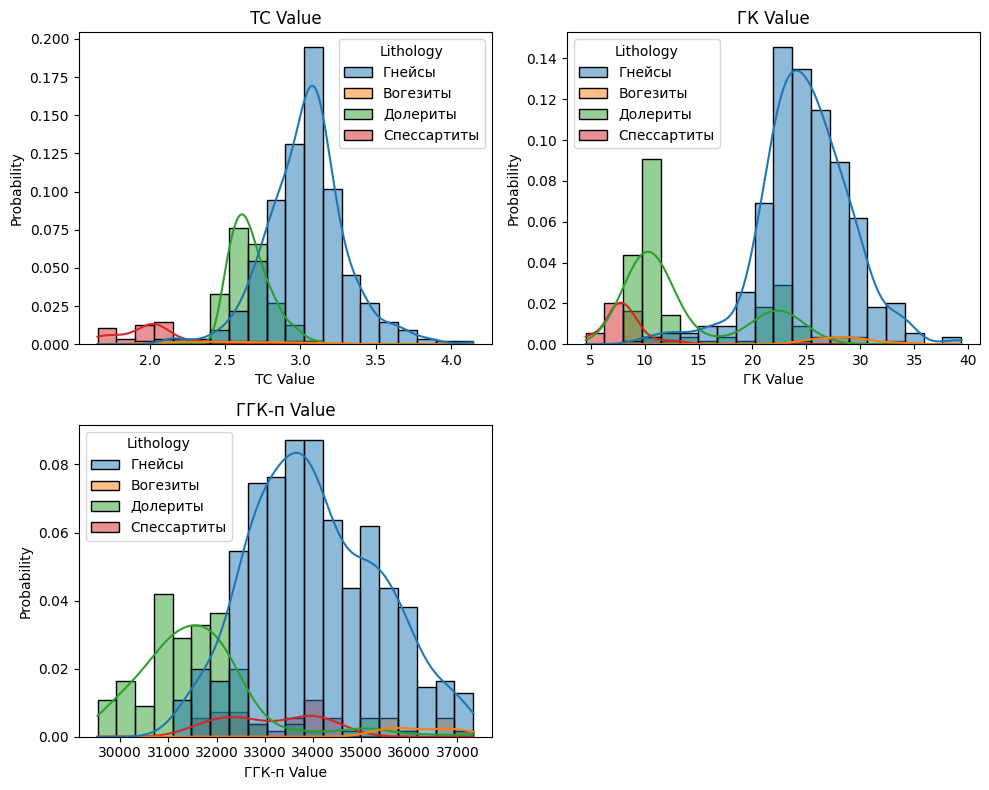

In [ ]:
# Assuming 'data' is your DataFrame and it's already defined

fig = plt.figure(figsize=(10, 8))

parameters_list = [ 'TC Value',
                   'ГК Value',
                   'ГГК-п Value'
]

# Calculate appropriate subplot grid size
rows = 2
cols = (len(parameters_list) + 1) // rows

for index, param in enumerate(parameters_list):
    ax = plt.subplot(rows, cols, index + 1)
    sns.histplot(data=result_new, x=param, hue='Lithology', stat="probability", kde=True, bins=20)
    plt.title(f'{param}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

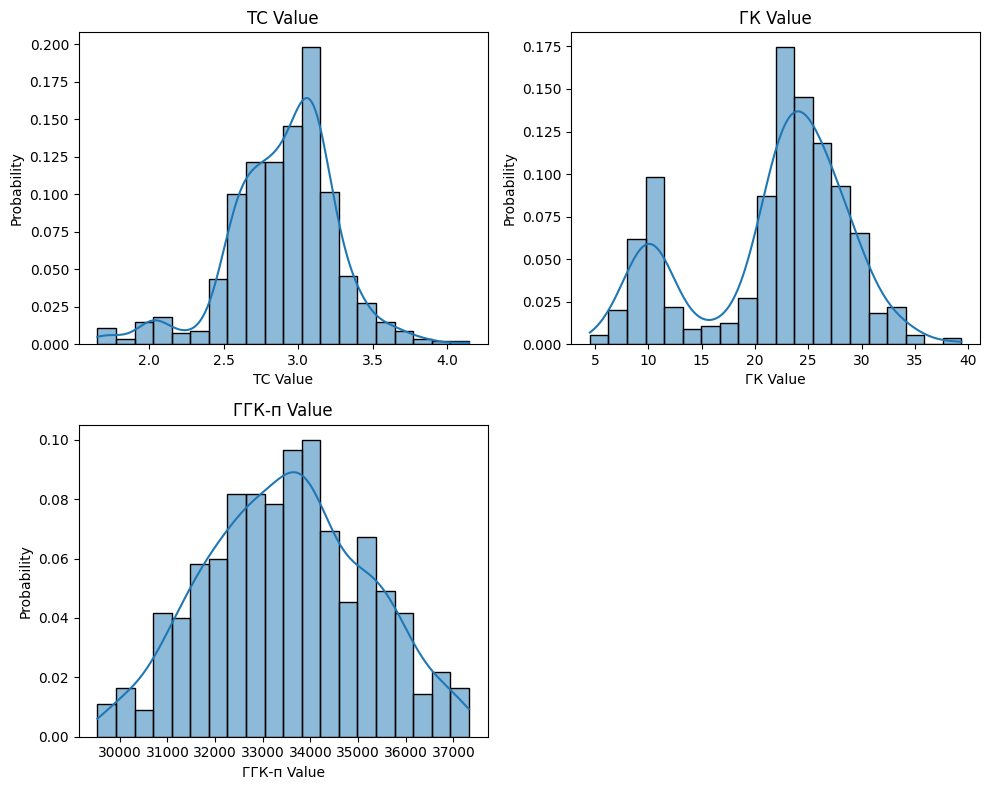

In [ ]:
# Assuming 'data' is your DataFrame and it's already defined

fig = plt.figure(figsize=(10, 8))

parameters_list = [ 'TC Value',
                   'ГК Value',
                   'ГГК-п Value'
]

# Calculate appropriate subplot grid size
rows = 2
cols = (len(parameters_list) + 1) // rows

for index, param in enumerate(parameters_list):
    ax = plt.subplot(rows, cols, index + 1)
    sns.histplot(data=result_new, x=param, stat="probability", kde=True, bins=20)
    plt.title(f'{param}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

In [ ]:
result_new.columns

Index(['Common Depth', 'Lithology', 'TC Value', 'ГК Value', 'ГГК-п Value'], dtype='object')

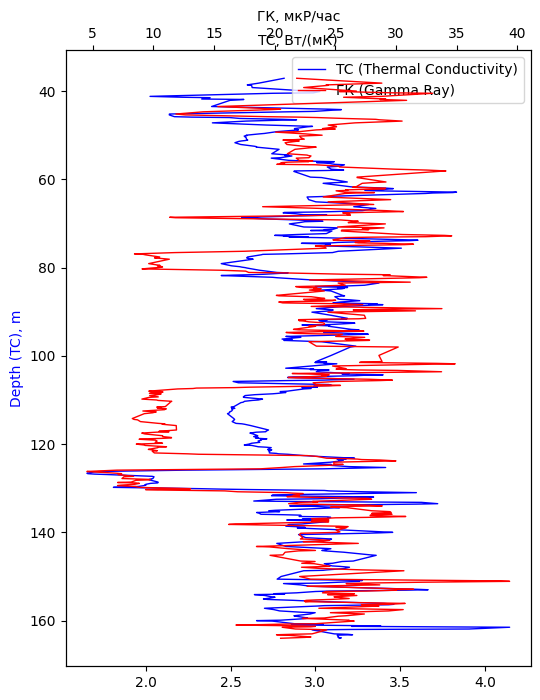

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 8))

data = result_new

# Data for the first plot
x1, y1 = data["TC Value"], data["Common Depth"]
ax1.plot(x1, y1, 'b-', label='TC (Thermal Conductivity)', lw=1)
ax1.set_ylabel('Depth (TC), m', color='b')
ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')

# Create a second x-axis for the second plot
ax2 = ax1.twiny()  # This creates a new x-axis that shares the y-axis with ax1
x2, y2 = data["ГК Value"], data["Common Depth"]
ax2.plot(x2, y2, 'r-', label='ГК (Gamma Ray)', lw=1)
ax2.set_xlabel('ГК, мкР/час')

# Set y-axis label for the second plot (optional if you want separate y-axis labels)
ax2.set_ylabel('Глубина (ГК),м', color='r')

# Add legends to the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

plt.show()

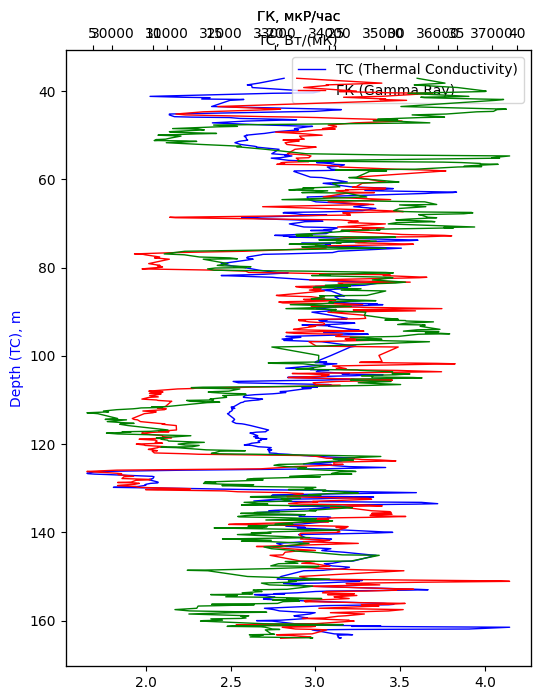

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 8))

data = merged_data

# Data for the first plot
x1, y1 = data["TC Value"], data["Common Depth"]
ax1.plot(x1, y1, 'b-', label='TC (Thermal Conductivity)', lw=1)
ax1.set_ylabel('Depth (TC), m', color='b')
ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')

# Create a second x-axis for the second plot
ax2 = ax1.twiny()  # This creates a new x-axis that shares the y-axis with ax1
x2, y2 = data["ГК Value"], data["Common Depth"]
ax2.plot(x2, y2, 'r-', label='ГК (Gamma Ray)', lw=1)
ax2.set_xlabel('ГК, мкР/час')

# Set y-axis label for the second plot (optional if you want separate y-axis labels)
ax2.set_ylabel('Глубина (ГК),м', color='r')

ax3 = ax1.twiny()  # This creates a new x-axis that shares the y-axis with ax1
x3, y3 = data["ГГК-п Value"], data["Common Depth"]
ax3.plot(x3, y3, 'g-', label='ГК (Gamma Ray)', lw=1)
ax3.set_xlabel('ГК, мкР/час')

# Add legends to the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

plt.show()

In [ ]:
X = result_new.drop('TC Value', axis=1)
y = result_new["TC Value"]
n = len(X)

Label encoding and normalization

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_clmn = X.select_dtypes(include='object').columns
# Apply Label Encoding to each categorical column
for col in categorical_clmn:
    X[col] = LabelEncoder().fit_transform(X[col])

<Axes: >

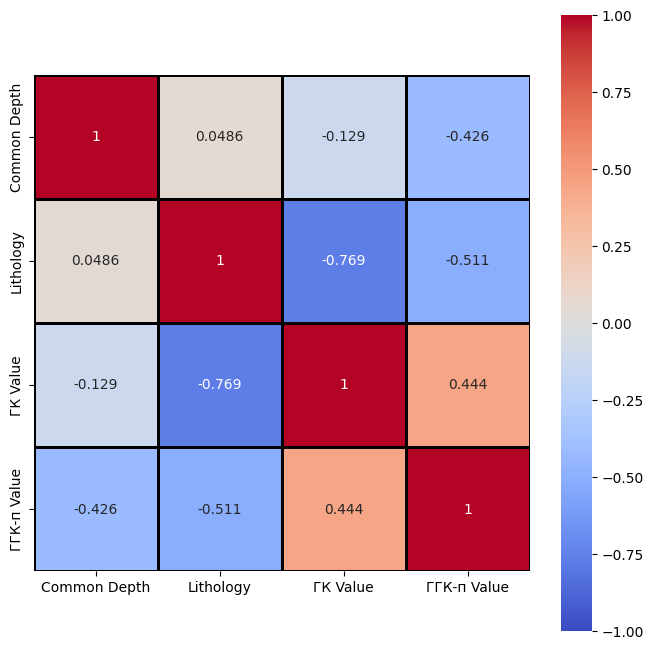

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(X.corr(),fmt = '.3g', square=True, annot = True,
            vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',
            linewidths=1, linecolor='black')

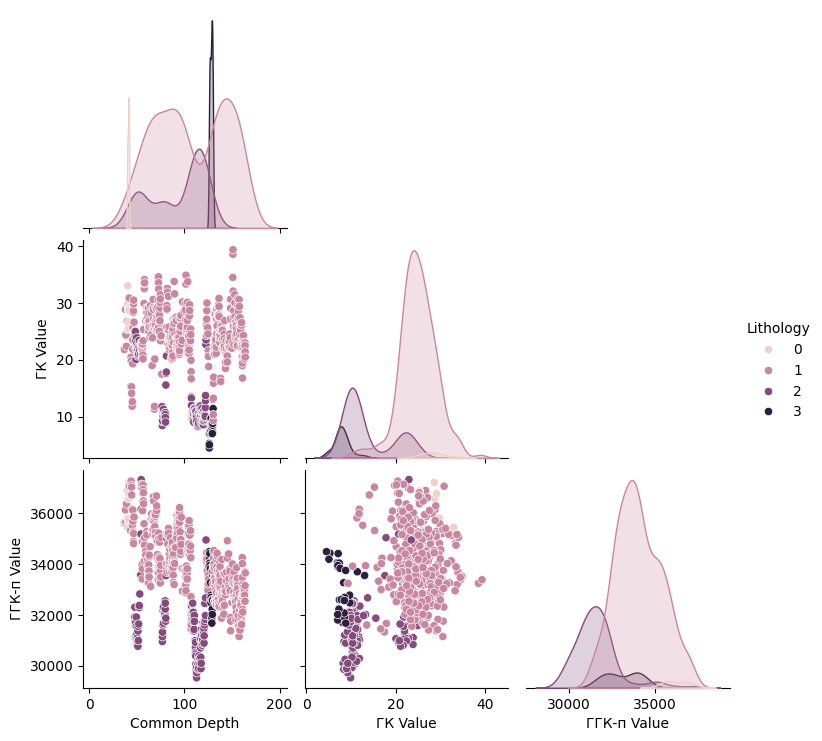

In [ ]:
sns.pairplot(data=X,hue='Lithology', corner=True)

In [ ]:
# Normalization of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_name = X.select_dtypes(include='float64')
X_numerical = X[['Common Depth', 'ГК Value', 'ГГК-п Value']]
X[list(columns_name)] = scaler.fit_transform(X_numerical[list(columns_name)])

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=int(n*0.15), random_state=0xC0FFEE)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=int(n*0.15), random_state=0xC0FFEE)

In [ ]:
X.shape

(550, 4)

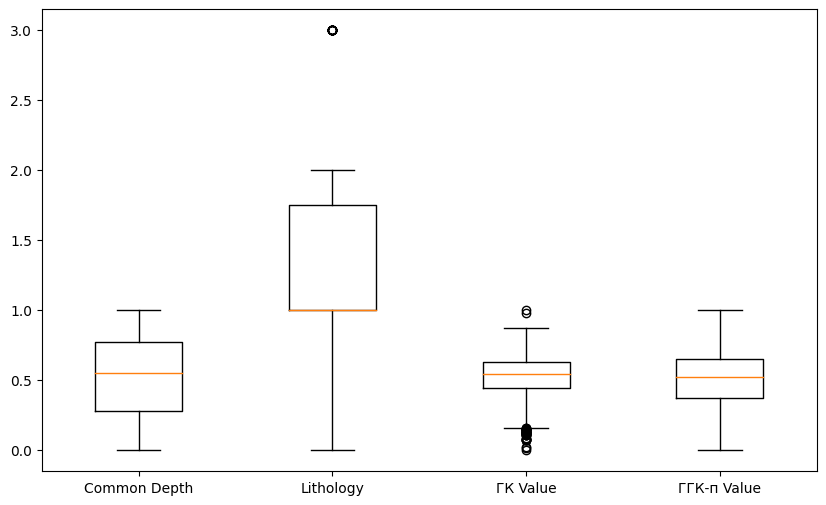

RandomForestRegressor:
Train mse: 0.02
Train R^2: 0.88
Validation: 0.04
Validation R^2: 0.5
Test: 0.03
Test  R^2: 0.77
{'max_features': 2, 'min_samples_split': 8, 'n_estimators': 10} 

ExtraTreesRegressor:
Train mse: 0.01
Train R^2: 0.91
Validation: 0.03
Validation R^2: 0.57
Test: 0.03
Test  R^2: 0.7
{'max_features': 3, 'min_samples_split': 6, 'n_estimators': 4} 

XGBRegressor:
Train mse: 0.04
Train R^2: 0.68
Validation: 0.04
Validation R^2: 0.39
Test: 0.03
Test  R^2: 0.65
{'learning_rate': 0.5025, 'max_depth': 1, 'n_estimators': 27} 

LinearRegression:
Train mse: 0.08
Train R^2: 0.44
Validation: 0.06
Validation R^2: -0.18
Test: 0.04
Test  R^2: 0.19
{} 

Ridge:
Train mse: 0.08
Train R^2: 0.44
Validation: 0.06
Validation R^2: -0.19
Test: 0.04
Test  R^2: 0.17
{} 

KNeighborsRegressor:
Train mse: 0.03
Train R^2: 0.79
Validation: 0.05
Validation R^2: 0.35
Test: 0.03
Test  R^2: 0.75
{} 

DecisionTreeRegressor:
Train mse: 0.0
Train R^2: 1.0
Validation: 0.05
Validation R^2: 0.51
Test: 0.03
Te

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor



RMSE_validation, RMSE_test = [], []
R2_validation, R2_test = [], []
model_name = []

plt.figure(figsize=(10, 6))

# Assuming X_train is defined and is a DataFrame
data = [X_train[i] for i in X_train.columns]

plt.boxplot(data, labels=X_train.columns)
plt.show()

models_list = [
    RandomForestRegressor(random_state=0xC0FFEE),
    ExtraTreesRegressor(random_state=0xC0FFEE),
    xgb.XGBRegressor(random_state=0xC0FFEE),
    LinearRegression(),
    Ridge(),
    KNeighborsRegressor(),
    DecisionTreeRegressor()
]

# names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
#          'K Neighbors Regressor', 'Decision Tree Regressor',
#          'Random Forest Regressor', 'Gradient Boosting Regressor',
#          'Adaboost Regressor']
# models = [LinearRegression(), Ridge(), Lasso(),
#           KNeighborsRegressor(), DecisionTreeRegressor(),
#           RandomForestRegressor(), GradientBoostingRegressor(),
#           AdaBoostRegressor()]

# Ensure that the range for max_features is valid
min_features = min(1, X_train.shape[1])
max_features = max(1, X_train.shape[1])

p_g1 = {
    'max_features': np.arange(min_features, max_features + 1),
    'n_estimators': np.linspace(2, 10, 4, dtype=int),
    'min_samples_split': np.arange(2, 10, 2),
}

p_g2 = {
    'max_features': np.arange(min_features, max_features + 1),
    'n_estimators': np.linspace(2, 10, 4, dtype=int),
    'min_samples_split': np.arange(2, 10, 2),
}

p_g3 = {
    "max_depth": np.arange(min_features, max_features + 1),
    'n_estimators': np.linspace(2, 40, 4, dtype=int),
    "learning_rate": np.linspace(0.005, 1 , 5),
}

p_g4 = {
}



params_list = [p_g1, p_g2, p_g3, p_g4, p_g4, p_g4, p_g4]

for reg, grid in zip(models_list, params_list):

    model_name.append(type(reg).__name__)

  # search for the optimal hyperparameters
    gs = GridSearchCV(reg, param_grid=grid, n_jobs=-1)
    gs.fit(X_val, y_val)
    best_reg = reg.__class__(**gs.best_params_)
    print(f'{type(reg).__name__}:')


  # use these values for our hyperparameters in the final calculation
    best_reg.fit(X_train, y_train)
    y_pred = best_reg.predict(X_train)
    print('Train mse:', mean_squared_error(y_pred, y_train).round(2))
    print('Train R^2:', r2_score(y_train, y_pred).round(2))

    y_pred = best_reg.predict(X_val)
    print('Validation:', mean_squared_error(y_pred, y_val).round(2))
    print('Validation R^2:', r2_score(y_pred, y_val).round(2))
    RMSE_validation.append(mean_squared_error(y_pred, y_val).round(2))
    R2_validation.append(r2_score(y_pred, y_val).round(2))

    y_pred = best_reg.predict(X_test)
    print('Test:', mean_squared_error(y_pred, y_test).round(2))
    print('Test  R^2:', r2_score(y_pred, y_test).round(2))
    RMSE_test.append(mean_squared_error(y_pred,y_test).round(2))
    R2_test.append(r2_score(y_pred,y_test).round(2))
    print(gs.best_params_, '\n')

In [ ]:
evaluation = pd.DataFrame({'Model': model_name,
                           'RMSE val': RMSE_validation,
                           'R2 val': R2_validation,
                           'RMSE test': RMSE_test,
                           'R2 test': R2_test})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE val,R2 val,RMSE test,R2 test
0,RandomForestRegressor,0.04,0.50,0.03,0.77
1,ExtraTreesRegressor,0.03,0.57,0.03,0.70
2,XGBRegressor,0.04,0.39,0.03,0.65
3,LinearRegression,0.06,-0.18,0.04,0.19
4,Ridge,0.06,-0.19,0.04,0.17
5,KNeighborsRegressor,0.05,0.35,0.03,0.75
6,DecisionTreeRegressor,0.05,0.51,0.03,0.77


Train R^2: 0.65


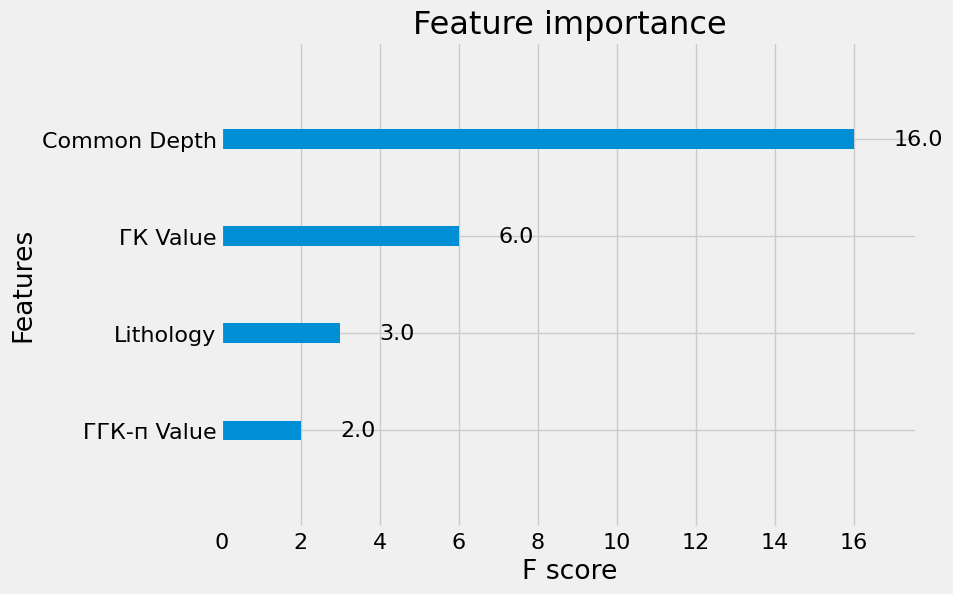

(1.5, 4.0)

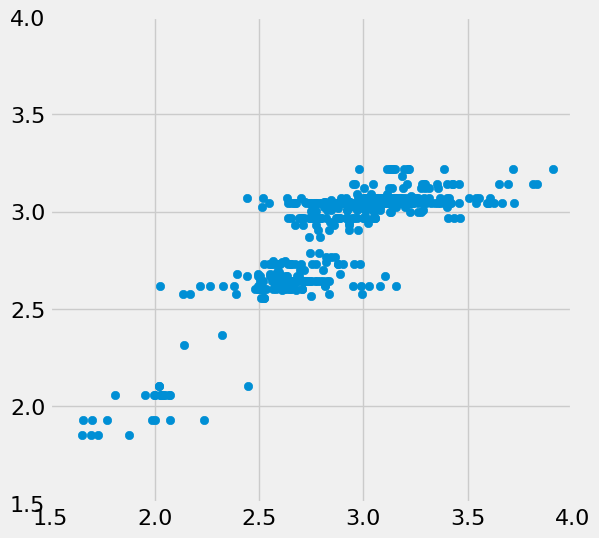

In [ ]:
best_xgb_regressor=xgb.XGBRegressor(
                          learning_rate = 0.5025,
                          n_estimators  = 27,
                          max_depth     = 1,
                          eval_metric='rmse')

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.12)
best_xgb_regressor.fit(X_train, y_train)
predictions = best_xgb_regressor.predict(X_test)
print('Train R^2:', r2_score(y_test, predictions).round(2))


# the feature importance for xgb!
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(8,6))
plot_importance(best_xgb_regressor, max_num_features=4, ax=ax)
plt.show();


# prediction for the whole dataset
y_pred = best_xgb_regressor.predict(X)

fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(y, y_pred)
plt.xlim(1.5, 4)
plt.ylim(1.5, 4)

In [ ]:

# Assuming X and y are defined and are your full dataset and targets
# Assuming X_train, X_val, y_train, y_val are subsets used for the grid search

# Define the parameter grid based on previous setup
param_grid = {
    'max_features': np.arange(min(1, X_train.shape[1]), max(1, X_train.shape[1]) + 1),
    'n_estimators': np.linspace(2, 20, 4, dtype=int),
    'min_samples_split': np.arange(2, 10, 2),
}

# Initialize the ExtraTreesRegressor with a fixed random state
# extra_trees = ExtraTreesRegressor(random_state=0xC0FFEE)
extra_trees = RandomForestRegressor(random_state=0xC0FFEE)


# Setup GridSearchCV
gs = GridSearchCV(extra_trees, param_grid=param_grid, n_jobs=-1)
gs.fit(X_val, y_val)  # Fit on validation set, or use another appropriate subset

# Extract the best parameters and fit on the entire dataset
best_params = gs.best_params_
best_extra_trees = ExtraTreesRegressor(**best_params, random_state=0xC0FFEE)
best_extra_trees.fit(X, y)  # Fit on the entire dataset
print(best_params)

# Predict the values of y
y_pred = best_extra_trees.predict(X)

{'max_features': 2, 'min_samples_split': 8, 'n_estimators': 20}


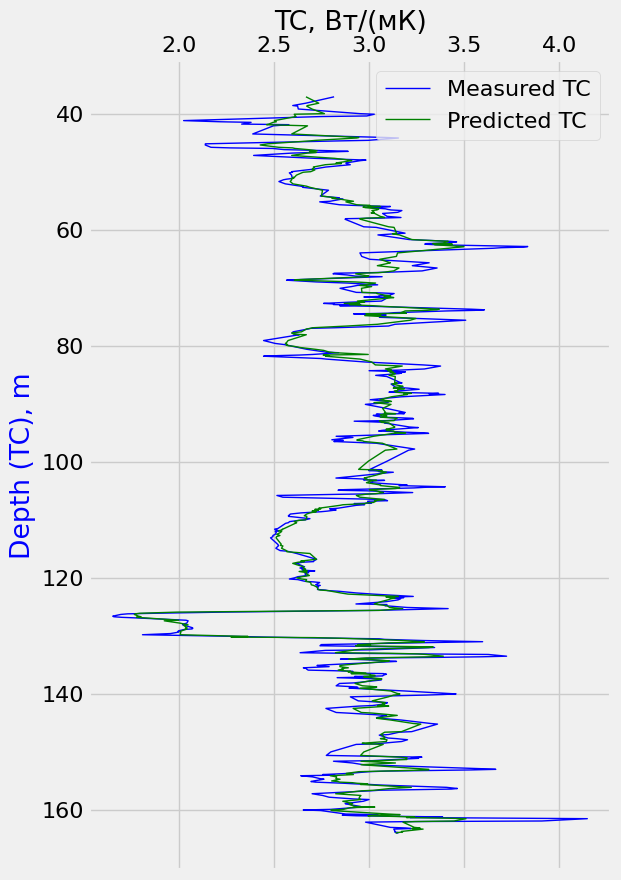

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 10))

# Data for the first plot
x1, y1 = merged_data["TC Value"], merged_data["Common Depth"]
ax1.plot(x1, y1, 'b-', label='Measured TC', lw=1)
x1, y1 = y_pred, merged_data["Common Depth"]
ax1.plot(x1, y1, 'g-', label='Predicted TC', lw=1)
ax1.set_ylabel('Depth (TC), m', color='b')

ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')
ax1.legend()

plt.show()

### Reg vs ML

In [ ]:
path_to_ser = Path('/content/Ros.xlsx')
data_reg = pd.read_excel(path_to_ser, skiprows=0)

In [ ]:
data_reg.columns

Index([6, '25-30', 'TC Exp', 'GK', 'TC pred', 'diff'], dtype='object')

In [ ]:
merged_data[10::]

,TC Value,Common Depth,ГК Value,ГГК-п Value
10,2.218660,41.4,25.68,35686.67
11,2.378956,41.5,26.57,35760.00
12,2.329364,41.8,29.15,36773.33
13,2.577912,41.9,28.69,37213.33
14,2.496474,42.1,30.87,37065.00
...,...,...,...,...
545,3.129074,163.3,21.05,32780.00
546,3.136196,163.7,22.99,32540.00
547,3.134156,163.8,22.50,33155.00
548,3.153052,163.9,21.41,33695.00


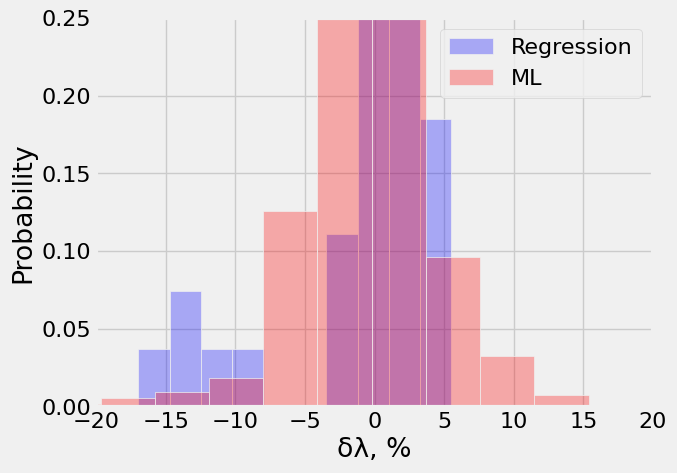

In [ ]:
fig, ax = plt.subplots()

x1 = merged_data["TC Value"]
x2 = y_pred
x3 = (x1-x2)/x1*100

# Plot both histograms on the same Axes
# sns.histplot(data=x1, bins=20, ax=ax, color="blue", label="Data X1")
sns.histplot(data=data_reg['diff'], bins=10, ax=ax, stat="probability", color="blue", alpha=0.3, label='Regression')
sns.histplot(data=x3, bins=10, ax=ax, stat="probability", color="red", alpha=0.3, label='ML')

# Add legend to distinguish the histograms
ax.legend()
ax.set_xlim(-20, 20)
ax.set_ylim(0, 0.25)

ax.set_xlabel('δλ, %')


# Show the plot
plt.show()

### Application to the whole subset

In [ ]:
path_to_ser = Path('/content/Rosatom/Data/Rosatom.xlsx')
data = pd.read_excel(path_to_ser, skiprows=0)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
new_data = data[["ГК, мкР/час", "Глубина (ГК),м", "ГГК-п имп/мин", "Глубина (ГГК-п), м"]]
new_data = new_data.dropna(subset=['ГК, мкР/час', 'ГГК-п имп/мин'])

In [ ]:
new_merged_data = pd.merge(
    new_data,
    new_data[['ГГК-п имп/мин', 'Глубина (ГГК-п), м']],
    left_on='Глубина (ГК),м',
    right_on='Глубина (ГГК-п), м',
    how='inner'
)

In [ ]:
new_merged_data

,"ГК, мкР/час","Глубина (ГК),м",ГГК-п имп/мин_x,"Глубина (ГГК-п), м_x",ГГК-п имп/мин_y,"Глубина (ГГК-п), м_y"
0,11.41,1.9,52880.00,3.7,48640.00,1.9
1,11.17,2.0,52813.33,3.8,50190.00,2.0
2,11.66,2.1,53106.67,3.9,50580.00,2.1
3,11.15,2.2,53235.00,4.0,50580.00,2.2
4,10.11,2.3,53535.00,4.1,51220.00,2.3
...,...,...,...,...,...,...
1609,25.39,162.8,32830.00,164.6,33106.67,162.8
1610,24.24,162.9,32795.00,164.7,33320.00,162.9
1611,23.08,163.0,32250.00,164.8,32930.00,163.0
1612,21.38,163.1,31820.00,164.9,32990.00,163.1


In [ ]:
data_to_use = new_merged_data[['ГК, мкР/час',	'Глубина (ГК),м',	'ГГК-п имп/мин_x']]

In [ ]:
data_to_use.rename(columns={
    'Глубина (ГК),м': 'Common Depth',
    'ГГК-п имп/мин_x': 'ГГК-п Value',
    'ГК, мкР/час': 'ГК Value'
}, inplace=True)

In [ ]:
X = data_to_use.copy()
n = len(X)

In [ ]:
# Normalization of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_name = X.select_dtypes(include='float64')
X[list(columns_name)] = scaler.fit_transform(X[list(columns_name)])

In [ ]:
X

,ГК Value,Common Depth,ГГК-п Value
0,0.197531,0.00000,0.581445
1,0.190640,0.00062,0.579808
2,0.204709,0.00124,0.587008
3,0.190066,0.00186,0.590158
4,0.160207,0.00248,0.597521
...,...,...,...
1609,0.598909,0.99752,0.089340
1610,0.565891,0.99814,0.088481
1611,0.532587,0.99876,0.075104
1612,0.483778,0.99938,0.064550


In [ ]:

X_order = X[['Common Depth', 'ГК Value', 'ГГК-п Value']]
X_order

,Common Depth,ГК Value,ГГК-п Value
0,0.00000,0.197531,0.581445
1,0.00062,0.190640,0.579808
2,0.00124,0.204709,0.587008
3,0.00186,0.190066,0.590158
4,0.00248,0.160207,0.597521
...,...,...,...
1609,0.99752,0.598909,0.089340
1610,0.99814,0.565891,0.088481
1611,0.99876,0.532587,0.075104
1612,0.99938,0.483778,0.064550


In [ ]:
# Predict the values of y
y_pred = best_extra_trees.predict(X_order)

In [ ]:
y_pred.shape

(1614,)

In [ ]:
path_to_ser = Path('/content/Rosatom/Data/Rosatom.xlsx')
data = pd.read_excel(path_to_ser, skiprows=0)

In [ ]:
y = data['TC, Вт/(мК)']
yy = data["Depth (TC), m"]

In [ ]:
df_new = pd.DataFrame()
df_new['TC avg'] = data['TC, Вт/(мК)'].rolling(window=1000).mean()
df_new['Depth TC avg'] = data["Depth (TC), m"].rolling(window=1000).mean()

In [ ]:
y.shape, yy.shape

((97768,), (97768,))

In [ ]:
df_new = df_new.dropna(subset='TC avg')
df_new.shape

(96269, 2)

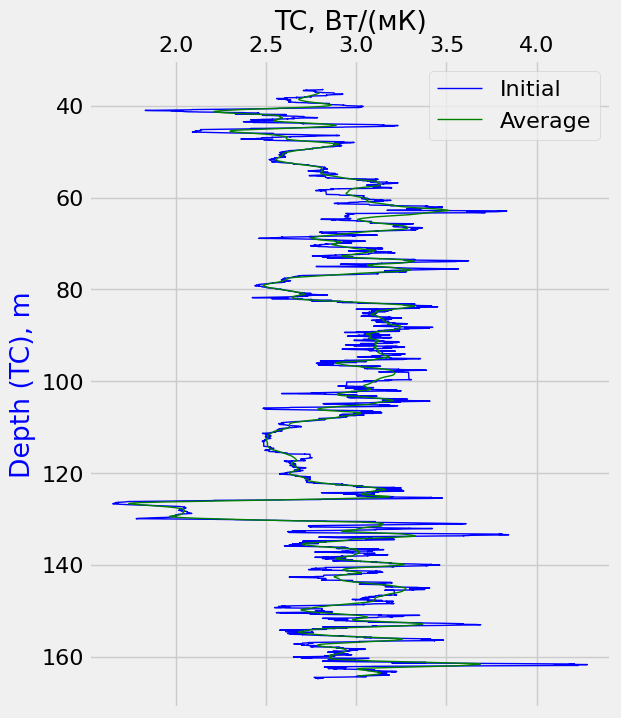

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 8))


# Data for the first plot
x1, y1 = y, yy
ax1.plot(x1, y1, 'b-', label='Initial', lw=1)

x1, y1 = df_new['TC avg'], df_new['Depth TC avg']
ax1.plot(x1, y1, 'g-', label='Average', lw=1)
ax1.set_ylabel('Depth (TC), m', color='b')

ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')
ax1.legend()

plt.show()

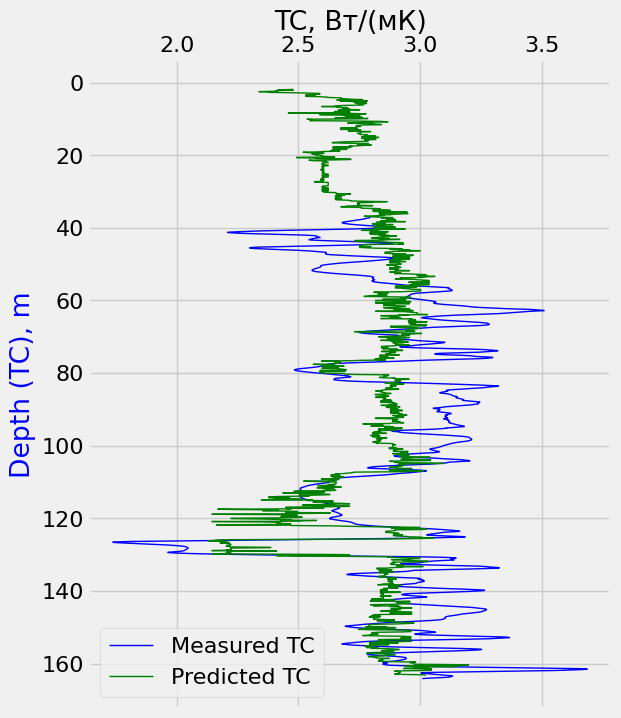

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 8))

data = merged_data

# Data for the first plot
# x1, y1 = y, yy
x1, y1 = df_new['TC avg'], df_new['Depth TC avg']
ax1.plot(x1, y1, 'b-', label='Measured TC', lw=1)
x1, y1 = y_pred, data_to_use["Common Depth"]
ax1.plot(x1, y1, 'g-', label='Predicted TC', lw=1)
ax1.set_ylabel('Depth (TC), m', color='b')

ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')
ax1.legend()

plt.show()

In [ ]:
path_to_ser = Path('/content/Rosatom/Data/Rosatom.xlsx')
data = pd.read_excel(path_to_ser, skiprows=0)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
data.columns

Index(['Sample ID', 'Depth (TC), m', 'TC, Вт/(мК)', 'Глубина (ГК),м',
       'ГК, мкР/час', 'Глубина (ГГК-п), м', 'ГГК-п имп/мин', 'Unnamed: 7',
       'Глубина (ПС), м', 'ПС', '№ образца', 'Глубина', '№ ящика', 'Интервал',
       'Top, m', 'Bot, m', 'L, m', 'Lcorr', 'Примечание',
       'Литологическое описание'],
      dtype='object')

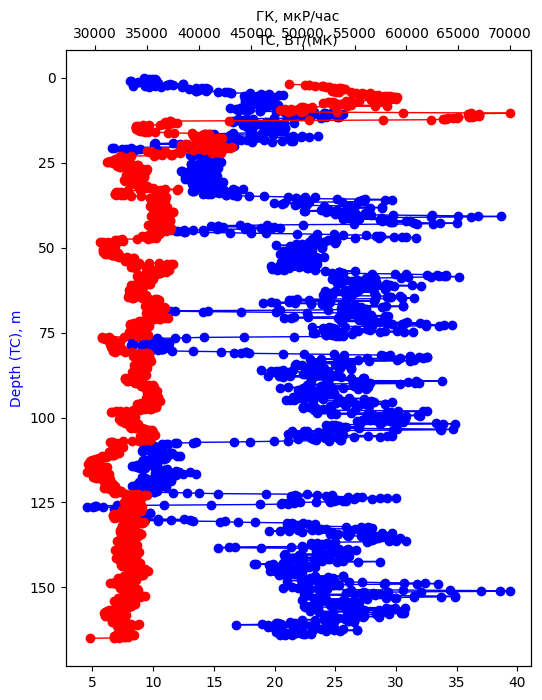

In [ ]:
# Data for the first plot
fig, ax1 = plt.subplots(figsize=(6, 8))
x1, y1 = data["ГК, мкР/час"], data["Глубина (ГК),м"]
ax1.plot(x1, y1, 'b-', label='TC (Thermal Conductivity)', marker='o', lw=1)
ax1.set_ylabel('Depth (TC), m', color='b')
ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')

# Create a second x-axis for the second plot
ax2 = ax1.twiny()  # This creates a new x-axis that shares the y-axis with ax1
x2, y2 = data["ГГК-п имп/мин"], data["Глубина (ГГК-п), м"]
ax2.plot(x2, y2, 'r-', label='ГК (Gamma Ray)', marker='o', lw=1)
ax2.set_xlabel('ГК, мкР/час')

# Set y-axis label for the second plot (optional if you want separate y-axis labels)
ax2.set_ylabel('Глубина (ГК),м', color='r')
plt.show()

In [ ]:
X = data[["ГК, мкР/час", "Глубина (ГК),м", "ГГК-п имп/мин", "Глубина (ГГК-п), м"]]
n = len(X)

In [ ]:
# Normalization of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_name = X.select_dtypes(include='float64')
X[list(columns_name)] = scaler.fit_transform(X[list(columns_name)])

<ipython-input-13-40c11b84dd77>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[list(columns_name)] = scaler.fit_transform(X[list(columns_name)])


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np

# Parameters
max_features = 2
n_estimators = 10
min_samples_split = 6

# Create the ExtraTreesRegressor object with specified parameters
etr = ExtraTreesRegressor(max_features=max_features, n_estimators=n_estimators, min_samples_split=min_samples_split, random_state=0xC0FFEE)

# Assuming X_train and y_train are defined and contain the training data
etr.fit(X_train, y_train)  # Fit the model with training data

# Assuming X contains the new data you want to predict
y_pred = etr.predict(X)  # Make predictions on new data

NotFittedError: This ExtraTreesRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### With Lithology

In [ ]:
X = result_new.drop('TC Value', axis=1)
y = result_new["TC Value"]
n = len(X)

In [ ]:
X.head()

,Common Depth,Lithology,ГК Value,ГГК-п Value
0,37.1,Гнейсы,21.82,35620.00
1,38.2,Гнейсы,28.83,36133.33
2,38.6,Гнейсы,24.24,35565.00
3,38.7,Гнейсы,24.42,35685.00
4,39.2,Гнейсы,22.39,36366.67


### Categorical to label encoding and drop columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_clmn = X.select_dtypes(include='object').columns
# Apply Label Encoding to each categorical column
for col in categorical_clmn:
    X[col] = LabelEncoder().fit_transform(X[col])

<Axes: >

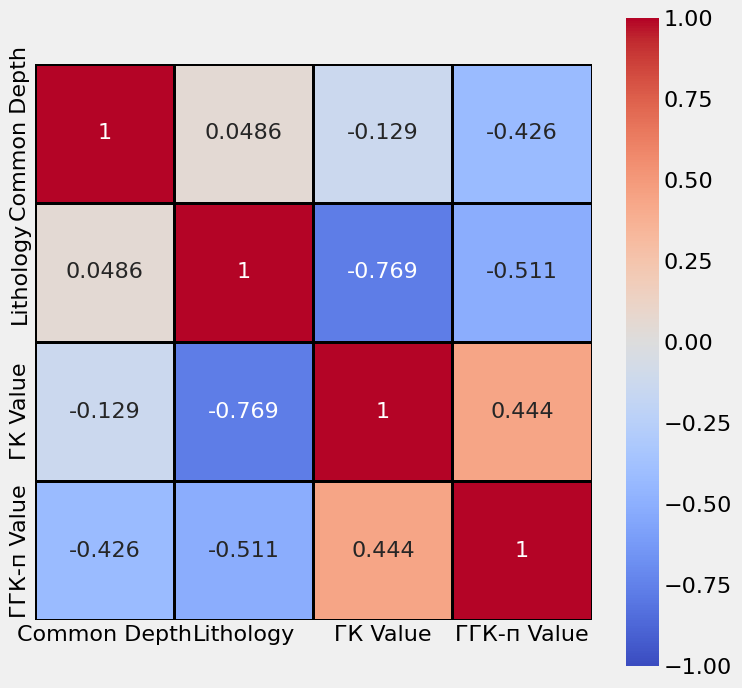

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(X.corr(),fmt = '.3g', square=True, annot = True,
            vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',
            linewidths=1, linecolor='black')

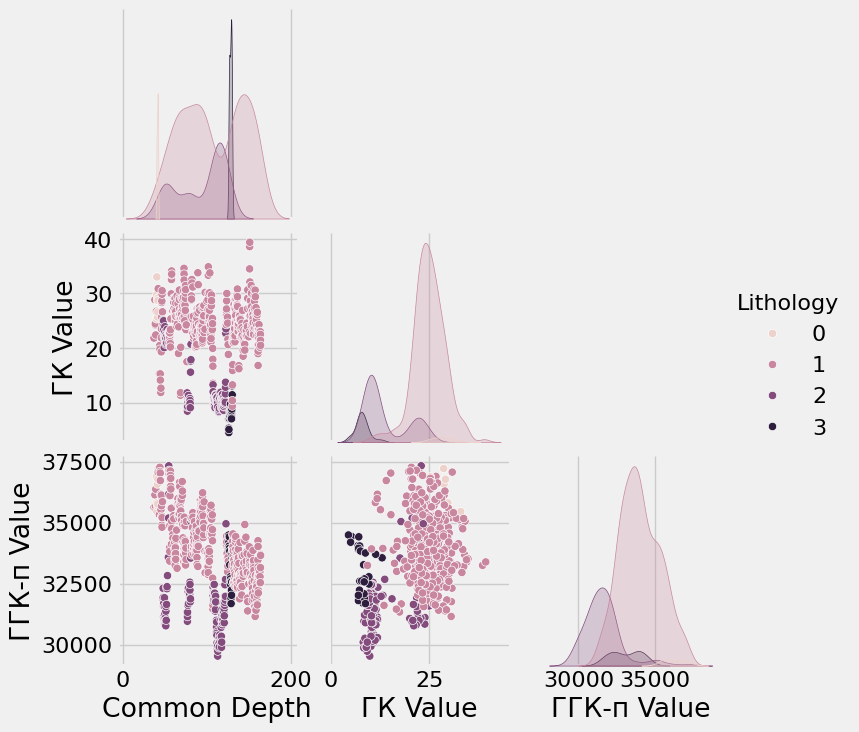

In [ ]:
sns.pairplot(data=X,hue='Lithology', corner=True)

In [ ]:
X.columns

Index(['Common Depth', 'Lithology', 'ГК Value', 'ГГК-п Value'], dtype='object')

In [ ]:
# Normalization of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_name = X.select_dtypes(include='float64')
X_numerical = X[['Common Depth', 'ГК Value', 'ГГК-п Value']]
X[list(columns_name)] = scaler.fit_transform(X_numerical[list(columns_name)])

In [ ]:
X

,Common Depth,Lithology,ГК Value,ГГК-п Value
0,0.000000,1,0.496411,0.781270
1,0.008668,1,0.697674,0.847124
2,0.011820,1,0.565891,0.774214
3,0.012608,1,0.571059,0.789609
4,0.016548,1,0.512776,0.877058
...,...,...,...,...
545,0.994484,1,0.474304,0.416934
546,0.997636,1,0.530003,0.386145
547,0.998424,1,0.515935,0.465042
548,0.999212,1,0.484640,0.534317


In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=int(n*0.15), random_state=0xC0FFEE)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=int(n*0.15), random_state=0xC0FFEE)

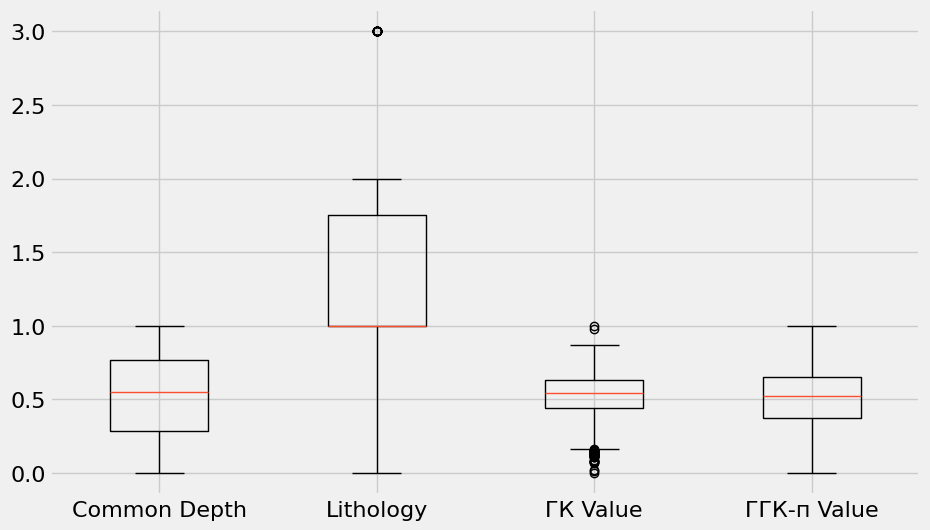

RandomForestRegressor:
Train mse: 0.02
Train R^2: 0.88
Validation: 0.04
Validation R^2: 0.46
Test: 0.03
Test  R^2: 0.76
{'max_features': 2, 'min_samples_split': 8, 'n_estimators': 10} 

ExtraTreesRegressor:
Train mse: 0.01
Train R^2: 0.91
Validation: 0.04
Validation R^2: 0.41
Test: 0.03
Test  R^2: 0.69
{'max_features': 3, 'min_samples_split': 6, 'n_estimators': 4} 

XGBRegressor:
Train mse: 0.04
Train R^2: 0.68
Validation: 0.04
Validation R^2: 0.39
Test: 0.03
Test  R^2: 0.65
{'learning_rate': 0.5025, 'max_depth': 1, 'n_estimators': 27} 

LinearRegression:
Train mse: 0.08
Train R^2: 0.44
Validation: 0.06
Validation R^2: -0.18
Test: 0.04
Test  R^2: 0.19
{} 

Ridge:
Train mse: 0.08
Train R^2: 0.44
Validation: 0.06
Validation R^2: -0.19
Test: 0.04
Test  R^2: 0.17
{} 

KNeighborsRegressor:
Train mse: 0.03
Train R^2: 0.79
Validation: 0.05
Validation R^2: 0.35
Test: 0.03
Test  R^2: 0.75
{} 

DecisionTreeRegressor:
Train mse: 0.0
Train R^2: 1.0
Validation: 0.05
Validation R^2: 0.55
Test: 0.03


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

RMSE_validation, RMSE_test = [], []
R2_validation, R2_test = [], []
model_name = []

plt.figure(figsize=(10, 6))

# Assuming X_train is defined and is a DataFrame
data = [X_train[i] for i in X_train.columns]

plt.boxplot(data, labels=X_train.columns)
plt.show()

models_list = [
    RandomForestRegressor(random_state=0xC0FFEE),
    ExtraTreesRegressor(random_state=0xC0FFEE),
    xgb.XGBRegressor(random_state=0xC0FFEE),
    LinearRegression(),
    Ridge(),
    KNeighborsRegressor(),
    DecisionTreeRegressor()
]

# names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
#          'K Neighbors Regressor', 'Decision Tree Regressor',
#          'Random Forest Regressor', 'Gradient Boosting Regressor',
#          'Adaboost Regressor']
# models = [LinearRegression(), Ridge(), Lasso(),
#           KNeighborsRegressor(), DecisionTreeRegressor(),
#           RandomForestRegressor(), GradientBoostingRegressor(),
#           AdaBoostRegressor()]

# Ensure that the range for max_features is valid
min_features = min(1, X_train.shape[1])
max_features = max(1, X_train.shape[1])

p_g1 = {
    'max_features': np.arange(min_features, max_features + 1),
    'n_estimators': np.linspace(2, 10, 4, dtype=int),
    'min_samples_split': np.arange(2, 10, 2),
}

p_g2 = {
    'max_features': np.arange(min_features, max_features + 1),
    'n_estimators': np.linspace(2, 10, 4, dtype=int),
    'min_samples_split': np.arange(2, 10, 2),
}

p_g3 = {
    "max_depth": np.arange(min_features, max_features + 1),
    'n_estimators': np.linspace(2, 40, 4, dtype=int),
    "learning_rate": np.linspace(0.005, 1 , 5),
}

p_g4 = {
}



params_list = [p_g1, p_g2, p_g3, p_g4, p_g4, p_g4, p_g4]

for reg, grid in zip(models_list, params_list):

    model_name.append(type(reg).__name__)

  # search for the optimal hyperparameters
    gs = GridSearchCV(reg, param_grid=grid, n_jobs=-1)
    gs.fit(X_val, y_val)
    best_reg = reg.__class__(**gs.best_params_)
    print(f'{type(reg).__name__}:')


  # use these values for our hyperparameters in the final calculation
    best_reg.fit(X_train, y_train)
    y_pred = best_reg.predict(X_train)
    print('Train mse:', mean_squared_error(y_pred, y_train).round(2))
    print('Train R^2:', r2_score(y_train, y_pred).round(2))

    y_pred = best_reg.predict(X_val)
    print('Validation:', mean_squared_error(y_pred, y_val).round(2))
    print('Validation R^2:', r2_score(y_pred, y_val).round(2))
    RMSE_validation.append(mean_squared_error(y_pred, y_val).round(2))
    R2_validation.append(r2_score(y_pred, y_val).round(2))

    y_pred = best_reg.predict(X_test)
    print('Test:', mean_squared_error(y_pred, y_test).round(2))
    print('Test  R^2:', r2_score(y_pred, y_test).round(2))
    RMSE_test.append(mean_squared_error(y_pred,y_test).round(2))
    R2_test.append(r2_score(y_pred,y_test).round(2))
    print(gs.best_params_, '\n')

In [ ]:
evaluation = pd.DataFrame({'Model': model_name,
                           'RMSE val': RMSE_validation,
                           'R2 val': R2_validation,
                           'RMSE test': RMSE_test,
                           'R2 test': R2_test})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE val,R2 val,RMSE test,R2 test
0,RandomForestRegressor,0.04,0.46,0.03,0.76
1,ExtraTreesRegressor,0.04,0.41,0.03,0.69
2,XGBRegressor,0.04,0.39,0.03,0.65
3,LinearRegression,0.06,-0.18,0.04,0.19
4,Ridge,0.06,-0.19,0.04,0.17
5,KNeighborsRegressor,0.05,0.35,0.03,0.75
6,DecisionTreeRegressor,0.05,0.55,0.03,0.75


In [ ]:

# Assuming X and y are defined and are your full dataset and targets
# Assuming X_train, X_val, y_train, y_val are subsets used for the grid search

# Define the parameter grid based on previous setup
param_grid = {
    'max_features': np.arange(min(1, X_train.shape[1]), max(1, X_train.shape[1]) + 1),
    'n_estimators': np.linspace(2, 10, 4, dtype=int),
    'min_samples_split': np.arange(2, 10, 2),
}

# Initialize the ExtraTreesRegressor with a fixed random state
# extra_trees = ExtraTreesRegressor(random_state=0xC0FFEE)
extra_trees = RandomForestRegressor(random_state=0xC0FFEE)


# Setup GridSearchCV
gs = GridSearchCV(extra_trees, param_grid=param_grid, n_jobs=-1)
gs.fit(X_val, y_val)  # Fit on validation set, or use another appropriate subset

# Extract the best parameters and fit on the entire dataset
best_params = gs.best_params_
best_extra_trees = ExtraTreesRegressor(**best_params, random_state=0xC0FFEE)
best_extra_trees.fit(X, y)  # Fit on the entire dataset
print(best_params)

# Predict the values of y
y_pred = best_extra_trees.predict(X)

{'max_features': 2, 'min_samples_split': 8, 'n_estimators': 10}


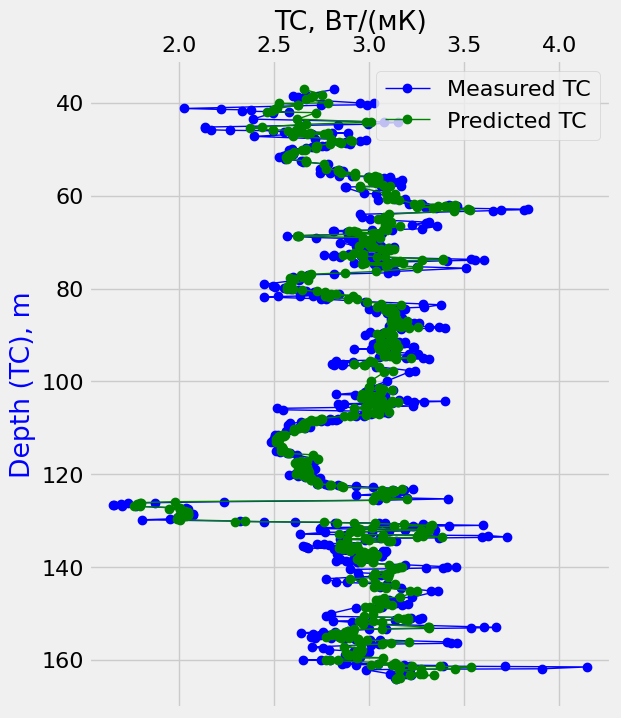

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 8))

# Data for the first plot
x1, y1 = merged_data["TC Value"], merged_data["Common Depth"]
ax1.plot(x1, y1, 'b-', label='Measured TC', marker='o', lw=1)
x1, y1 = y_pred, merged_data["Common Depth"]
ax1.plot(x1, y1, 'g-', label='Predicted TC', marker='o', lw=1)
ax1.set_ylabel('Depth (TC), m', color='b')

ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')
ax1.legend()

plt.show()

Train R^2: 0.52


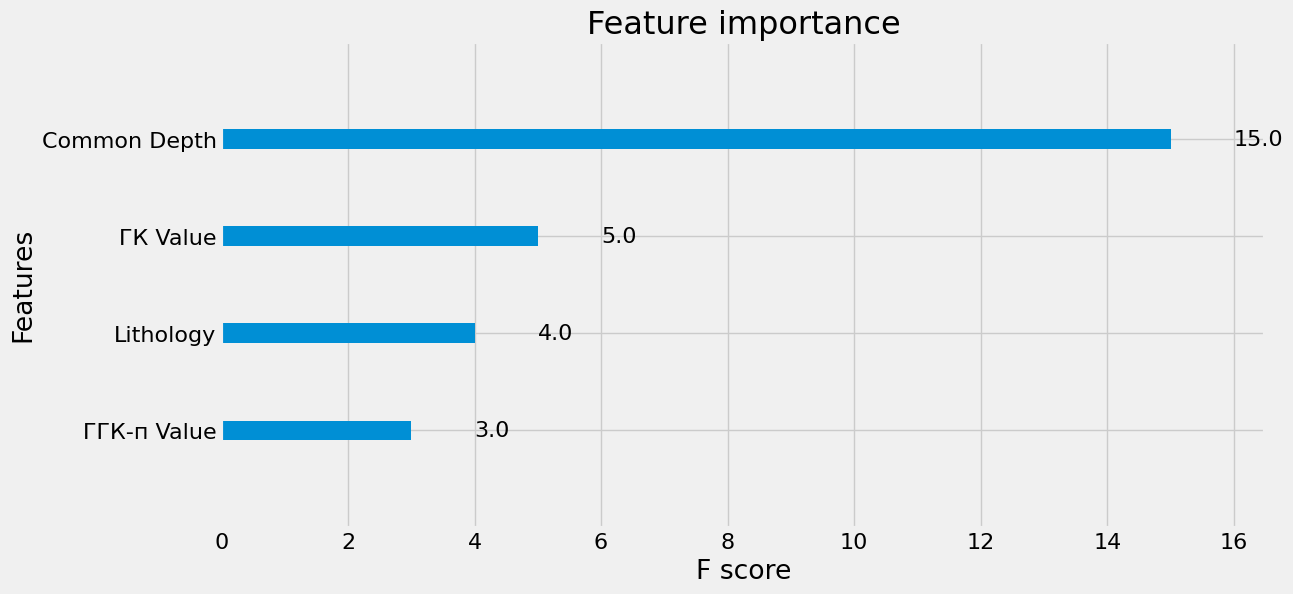

(1.5, 4.0)

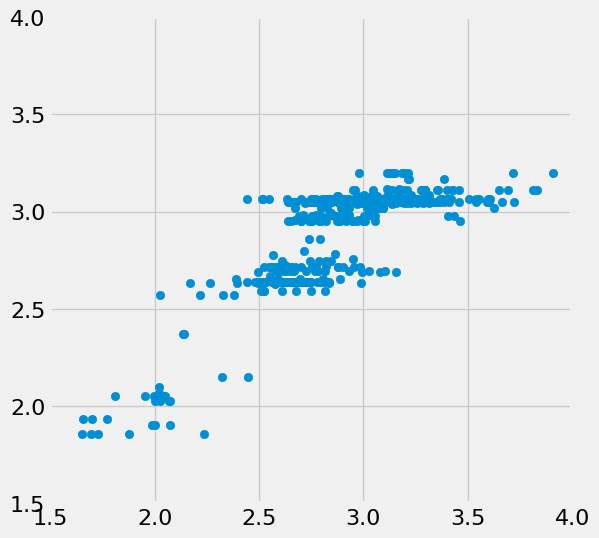

In [ ]:
best_xgb_regressor=xgb.XGBRegressor(
                          learning_rate = 0.5025,
                          n_estimators  = 27,
                          max_depth     = 1,
                          eval_metric='rmse')

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.12)
best_xgb_regressor.fit(X_train, y_train)
predictions = best_xgb_regressor.predict(X_test)
print('Train R^2:', r2_score(y_test, predictions).round(2))


# the feature importance for xgb!
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(best_xgb_regressor, max_num_features=4, ax=ax)
plt.show();


# prediction for the whole dataset
y_pred = best_xgb_regressor.predict(X)

fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(y, y_pred)
plt.xlim(1.5, 4)
plt.ylim(1.5, 4)

In [ ]:
path_to_ser = Path('/content/Rosatom/Data/Rosatom.xlsx')
data = pd.read_excel(path_to_ser, skiprows=0)

In [ ]:
new_data = data[["ГК, мкР/час", "Глубина (ГК),м", "ГГК-п имп/мин", "Глубина (ГГК-п), м"]]
new_data = new_data.dropna(subset=['ГК, мкР/час', 'ГГК-п имп/мин'])

In [ ]:
new_merged_data = pd.merge(
    new_data,
    new_data[['ГГК-п имп/мин', 'Глубина (ГГК-п), м']],
    left_on='Глубина (ГК),м',
    right_on='Глубина (ГГК-п), м',
    how='inner'
)

In [ ]:
new_merged_data

,"ГК, мкР/час","Глубина (ГК),м",ГГК-п имп/мин_x,"Глубина (ГГК-п), м_x",ГГК-п имп/мин_y,"Глубина (ГГК-п), м_y"
0,11.41,1.9,52880.00,3.7,48640.00,1.9
1,11.17,2.0,52813.33,3.8,50190.00,2.0
2,11.66,2.1,53106.67,3.9,50580.00,2.1
3,11.15,2.2,53235.00,4.0,50580.00,2.2
4,10.11,2.3,53535.00,4.1,51220.00,2.3
...,...,...,...,...,...,...
1609,25.39,162.8,32830.00,164.6,33106.67,162.8
1610,24.24,162.9,32795.00,164.7,33320.00,162.9
1611,23.08,163.0,32250.00,164.8,32930.00,163.0
1612,21.38,163.1,31820.00,164.9,32990.00,163.1


In [ ]:
data_to_use = new_merged_data[['ГК, мкР/час',	'Глубина (ГК),м',	'ГГК-п имп/мин_x']]

In [ ]:
lithology = data[['Кровля', 'Подошва','Литология']].dropna()

In [ ]:
lithology

,Кровля,Подошва,Литология
0,5.0,19.0,Гнейсы
1,19.1,21.5,Вогезиты
2,21.6,35.1,Долериты
3,35.2,40.0,Гнейсы
4,40.1,42.0,Вогезиты
5,42.1,47.7,Гнейсы
6,47.8,55.0,Долериты
7,55.1,76.5,Гнейсы
8,76.6,81.3,Долериты
9,81.4,107.3,Гнейсы


In [ ]:
data_to_use

,"ГК, мкР/час","Глубина (ГК),м",ГГК-п имп/мин_x
0,11.41,1.9,52880.00
1,11.17,2.0,52813.33
2,11.66,2.1,53106.67
3,11.15,2.2,53235.00
4,10.11,2.3,53535.00
...,...,...,...
1609,25.39,162.8,32830.00
1610,24.24,162.9,32795.00
1611,23.08,163.0,32250.00
1612,21.38,163.1,31820.00


In [ ]:
data_to_use.rename(columns={
    'Глубина (ГК),м': 'Common Depth',
    'ГГК-п имп/мин_x': 'ГГК-п Value',
    'ГК, мкР/час': 'ГК Value'
}, inplace=True)

In [ ]:
data_copy = data_to_use.copy()

In [ ]:
data_copy

,ГК Value,Common Depth,ГГК-п Value
0,11.41,1.9,52880.00
1,11.17,2.0,52813.33
2,11.66,2.1,53106.67
3,11.15,2.2,53235.00
4,10.11,2.3,53535.00
...,...,...,...
1609,25.39,162.8,32830.00
1610,24.24,162.9,32795.00
1611,23.08,163.0,32250.00
1612,21.38,163.1,31820.00


In [ ]:
def lit_func(lithology, merged_data):

  corresponding_lit = pd.DataFrame(columns=['Common Depth', 'Lithology'])

  for index, row in merged_data.iterrows():
      common_depth = row['Common Depth']
      mask = (lithology['Кровля'] <= common_depth) & (lithology['Подошва'] >= common_depth)
      filtered_lithology = lithology[mask]
      # print(common_depth, filtered_lithology )

      # if not filtered_lithology.empty:

      for _, lit_row in filtered_lithology.iterrows():
          new_row = pd.DataFrame({
              'Common Depth': [common_depth],
              'Lithology': [lit_row['Литология']]
          })
          corresponding_lit = pd.concat([corresponding_lit, new_row], ignore_index=True)

  return corresponding_lit

In [ ]:
lit_func(lithology, data_to_use)

,Common Depth,Lithology
0,5.0,Гнейсы
1,5.1,Гнейсы
2,5.2,Гнейсы
3,5.3,Гнейсы
4,5.4,Гнейсы
...,...,...
1578,162.8,Гнейсы
1579,162.9,Гнейсы
1580,163.0,Гнейсы
1581,163.1,Гнейсы


In [ ]:
result_new_pr = pd.merge(
    lit_func(lithology, data_to_use),
    data_to_use,
    left_on='Common Depth',
    right_on='Common Depth',
    how='inner'
)

# merged_data.drop(columns=['Глубина (ГГК-п), м'], inplace=True)

In [ ]:
data_copy = result_new_pr

In [ ]:
depth_tc = result_new_pr.copy()

In [ ]:
result_new_pr

,Common Depth,Lithology,ГК Value,ГГК-п Value
0,5.0,Гнейсы,20.38,54695.00
1,5.1,Гнейсы,19.37,54126.67
2,5.2,Гнейсы,18.56,52950.00
3,5.3,Гнейсы,17.48,52640.00
4,5.4,Гнейсы,17.66,52453.33
...,...,...,...,...
1578,162.8,Гнейсы,25.39,32830.00
1579,162.9,Гнейсы,24.24,32795.00
1580,163.0,Гнейсы,23.08,32250.00
1581,163.1,Гнейсы,21.38,31820.00


In [ ]:
X = result_new_pr
n = len(X)

In [ ]:
X.head()

,Common Depth,Lithology,ГК Value,ГГК-п Value
0,5.0,Гнейсы,20.38,54695.00
1,5.1,Гнейсы,19.37,54126.67
2,5.2,Гнейсы,18.56,52950.00
3,5.3,Гнейсы,17.48,52640.00
4,5.4,Гнейсы,17.66,52453.33


In [ ]:
categorical_clmn = X.select_dtypes(include='object').columns
# Apply Label Encoding to each categorical column
for col in categorical_clmn:
    X[col] = LabelEncoder().fit_transform(X[col])

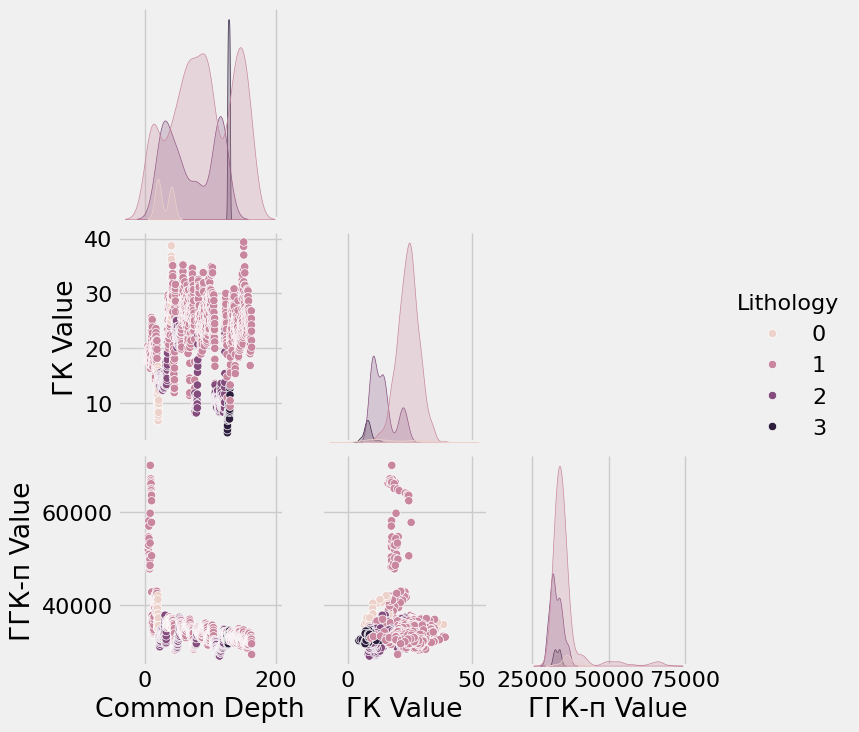

In [ ]:
sns.pairplot(data=X,hue='Lithology', corner=True)

In [ ]:
X.columns

Index(['Common Depth', 'Lithology', 'ГК Value', 'ГГК-п Value'], dtype='object')

In [ ]:
# Normalization of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_name = X.select_dtypes(include='float64')
X_numerical = X[['Common Depth', 'ГК Value', 'ГГК-п Value']]
X[list(columns_name)] = scaler.fit_transform(X_numerical[list(columns_name)])

In [ ]:
X

,Common Depth,Lithology,ГК Value,ГГК-п Value
0,0.000000,1,0.455067,0.625992
1,0.000632,1,0.426069,0.612043
2,0.001264,1,0.402814,0.583163
3,0.001896,1,0.371806,0.575554
4,0.002528,1,0.376974,0.570973
...,...,...,...,...
1578,0.997472,1,0.598909,0.089340
1579,0.998104,1,0.565891,0.088481
1580,0.998736,1,0.532587,0.075104
1581,0.999368,1,0.483778,0.064550


In [ ]:
y_pred_new = best_extra_trees.predict(X)

In [ ]:
data_to_use = new_merged_data[['ГК, мкР/час',	'Глубина (ГК),м',	'ГГК-п имп/мин_x']]

In [ ]:
data_to_use.columns

Index(['ГК, мкР/час', 'Глубина (ГК),м', 'ГГК-п имп/мин_x'], dtype='object')

In [ ]:
path_to_ser = Path('/content/Rosatom/Data/Rosatom.xlsx')
data = pd.read_excel(path_to_ser, skiprows=0)

In [ ]:
y = data['TC, Вт/(мК)']
yy = data["Depth (TC), m"]

In [ ]:
df_new = pd.DataFrame()
n_average = 1000
df_new['TC avg'] = data['TC, Вт/(мК)'].rolling(window=n_average).mean()
df_new['Depth TC avg'] = data["Depth (TC), m"].rolling(window=n_average).mean()

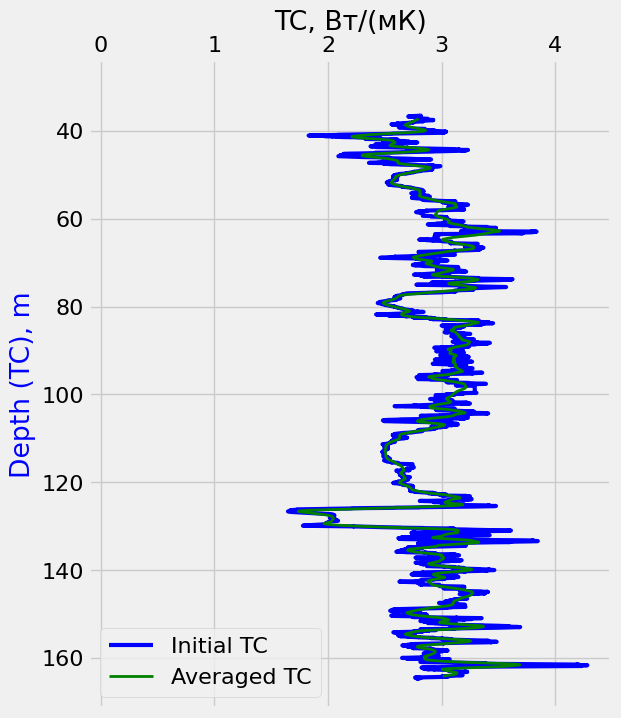

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 8))

data = merged_data

# Data for the first plot
x1, y1 = y, yy
ax1.plot(x1, y1, 'b-', label='Initial TC', lw=3)

x1, y1 = df_new['TC avg'], df_new['Depth TC avg']
ax1.plot(x1, y1, 'g-', label='Averaged TC', lw=2)
ax1.set_ylabel('Depth (TC), m', color='b')

ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')
ax1.legend()

plt.show()

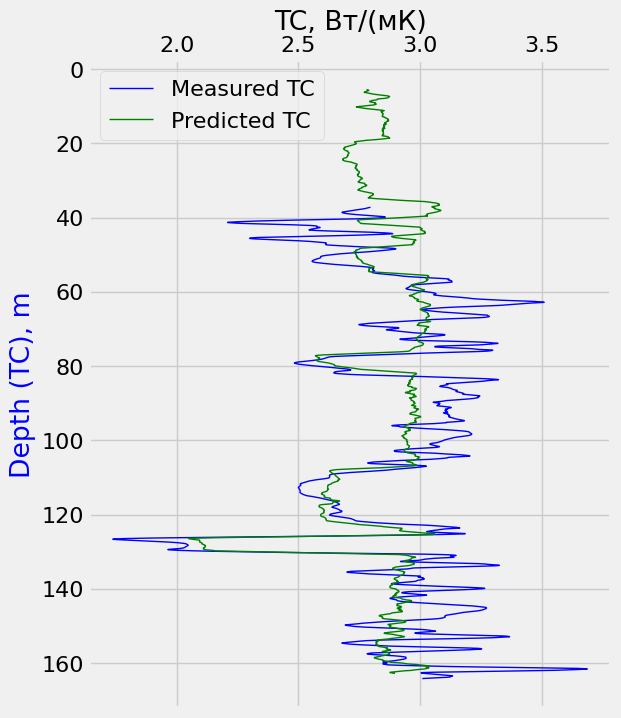

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 8))

data = merged_data

# Data for the first plot
x1, y1 = y, yy
x1, y1 = df_new['TC avg'], df_new['Depth TC avg']
ax1.plot(x1, y1, 'b-', label='Measured TC', lw=1)

x2 = pd.DataFrame(y_pred_new).rolling(window=10).mean()
y2 = depth_tc["Common Depth"].rolling(window=10).mean()

# x1, y1 = y_pred_new , depth_tc["Common Depth"]
ax1.plot(x2, y2, 'g-', label='Predicted TC', lw=1)
ax1.set_ylabel('Depth (TC), m', color='b')

ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')
ax1.legend()

plt.show()

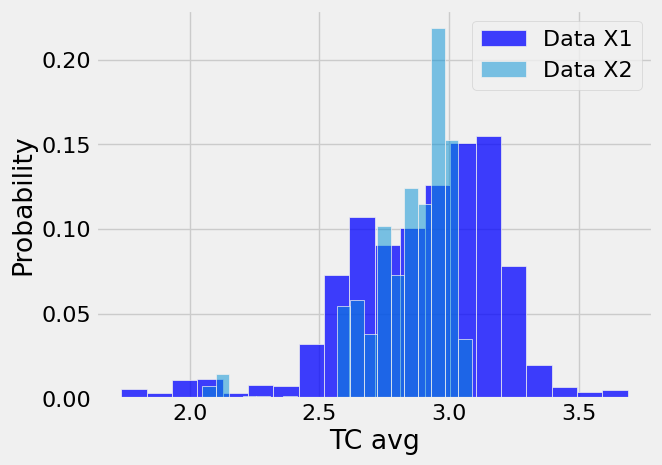

In [ ]:
# Create a figure and a single axes object
fig, ax = plt.subplots()

# Plot both histograms on the same Axes
sns.histplot(data=x1, stat="probability", bins=20, ax=ax, color="blue", label="Data X1")
sns.histplot(data=x2, stat="probability", bins=20, ax=ax, color="red", label="Data X2")

# Add legend to distinguish the histograms
ax.legend()

# Show the plot
plt.show()